#**Application - Twitter data**

# **Part 1: Popularity Prediction**

In [ ]:
import json
import datetime
import pytz
import time
import pandas as pd
from pandas import DataFrame
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tqdm
import math
random.seed(42)

In [ ]:
# mount gdrive and confrim that dataset exists in this directory
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#upload the dataset to your google drive and put it in this path
%cd "/content/gdrive/My Drive/219/ECE219_tweet_data/"
!ls -a
file_path = !pwd
file_path = file_path[0]
print("File path: ", file_path)

/content/gdrive/My Drive/219/ECE219_tweet_data
tweets_#gohawks.txt	tweets_#nfl.txt       tweets_#sb49.txt
tweets_#gopatriots.txt	tweets_#patriots.txt  tweets_#superbowl.txt
File path:  /content/gdrive/My Drive/219/ECE219_tweet_data


## Question 1
Report the following statistics for each hastag:

  - Average number of tweets per hour
  - Average number of followers of users posting the tweets per tweet
    - note: (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well) 
  - Average number of retweets per tweers

In [ ]:
# Designed to be referenced through 'files_dict' for key, value in tqdm(filename_dict.items(), desc="Loading 6 files"):
def basicStatisticsParse(filename_dict, combined=False):
    data_dict = {}
    time, num_followers, num_retweets = [], [], []
    for key, value in tqdm.tqdm(filename_dict.items(), desc='File Loop'):
        with open(os.path.join(file_path, value+'.txt'), 'r') as file:
            for line in file:
                data_line = json.loads(line)
                time.append(data_line['citation_date'])
                num_followers.append(data_line['author']['followers'])
                num_retweets.append(data_line['metrics']['citations']['total'])
        # create a pandas dataframe with this information
        if not combined:
            metric_names = ['time', 'num_followers', 'num_retweets']
            next_df = pd.DataFrame({
                'time' : time,
                'num_followers' : num_followers,
                'num_retweets' : num_retweets
            }, columns=metric_names)
            data_dict[key] = next_df
            time, num_followers, num_retweets = [], [], []
    if combined:
        metric_names = ['time', 'num_followers', 'num_retweets']
        next_df = pd.DataFrame({
            'time' : time,
            'num_followers' : num_followers,
            'num_retweets' : num_retweets
        }, columns=metric_names)
        data_dict['aggregate_tweets'] = next_df
    return data_dict

# Report statistics for files being parsed
def reportBasicStatistics(basic_stats):
    for key, value in basic_stats.items():
        print("~"*30,'\n','Tweets containing \'#'+key+'\'','\n')
        time_diff = (max(value['time']) - min(value['time']))
        hours_frac = time_diff / 3600
        total_tweets = len(value['time'])
        print("Average tweets per hour: ", str(round(float(total_tweets / hours_frac), 3)))
        print("Average number of followers*: ", str(round(float(sum(value['num_followers']) / total_tweets),2)))
        print("Average number of retweets: ", str(round(float(sum(value['num_retweets']) / total_tweets),2)),"\n","~"*29)

In [ ]:
# read files and parse into dataframes
filename_dict = {
    "patriots": "tweets_#patriots",
    "superbowl": "tweets_#superbowl",
    "nfl": "tweets_#nfl",
    "gopatriots": "tweets_#gopatriots",
    "sb49": "tweets_#sb49",
    "gohawks": "tweets_#gohawks"
}

basic_stats = basicStatisticsParse(filename_dict)

for key in basic_stats:
    print('Key:', key, 'Value Size:', basic_stats[key].shape)

reportBasicStatistics(basic_stats)

File Loop: 100%|██████████| 6/6 [03:08<00:00, 31.42s/it]


Key: patriots Value Size: (440621, 3)
Key: superbowl Value Size: (1213813, 3)
Key: nfl Value Size: (233022, 3)
Key: gopatriots Value Size: (23511, 3)
Key: sb49 Value Size: (743649, 3)
Key: gohawks Value Size: (169122, 3)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Tweets containing '#patriots' 

Average tweets per hour:  750.894
Average number of followers*:  3280.46
Average number of retweets:  1.79 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Tweets containing '#superbowl' 

Average tweets per hour:  2072.118
Average number of followers*:  8814.97
Average number of retweets:  2.39 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Tweets containing '#nfl' 

Average tweets per hour:  397.021
Average number of followers*:  4662.38
Average number of retweets:  1.53 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Tweets containing '#gopatriots' 

Average tweets per hour:  40.955
Average number of followers*:  1427.25
Average number of retweets:  1.

## Question 2
Plot "number of tweets in hours"
 - over time for #SuperBowl and #NFL (a bar plot with 1-hour bins)

In [ ]:
# plot the "number of tweets in an hour for #Superbowl and #NFL"
def plotTweetsPerHour(key, dataframe, logscale=0):
    print('Histogram of tweets/hour for \'#' + key + '\'', 'tweets:')
    values = dataframe[key]
    values = values.sort_values(by='time')
    starttime = min(values['time'])
    hours = round((max(values['time']) - starttime)/3600)
    bins = np.array([0]*(hours + 1))
    for tweettime in values['time']:
        nextbin = round((tweettime - starttime)/3600)
        bins[nextbin] += 1
    plt.figure(figsize=(15,10))
    if logscale == 0:
        plt.yscale("linear")
    elif logscale == 1:
        plt.yscale("log")
    plt.bar(x=[i for i in range(0,len(bins))], height=bins)
    plt.xlabel('Hours since first tweet')
    plt.ylabel('Number of tweets in bin')
    title_str = 'Histogram of tweets/hour for tweets containing \'#' + key + '\''
    plt.title(title_str)
    plt.show()

Histogram of tweets/hour for '#nfl' tweets:


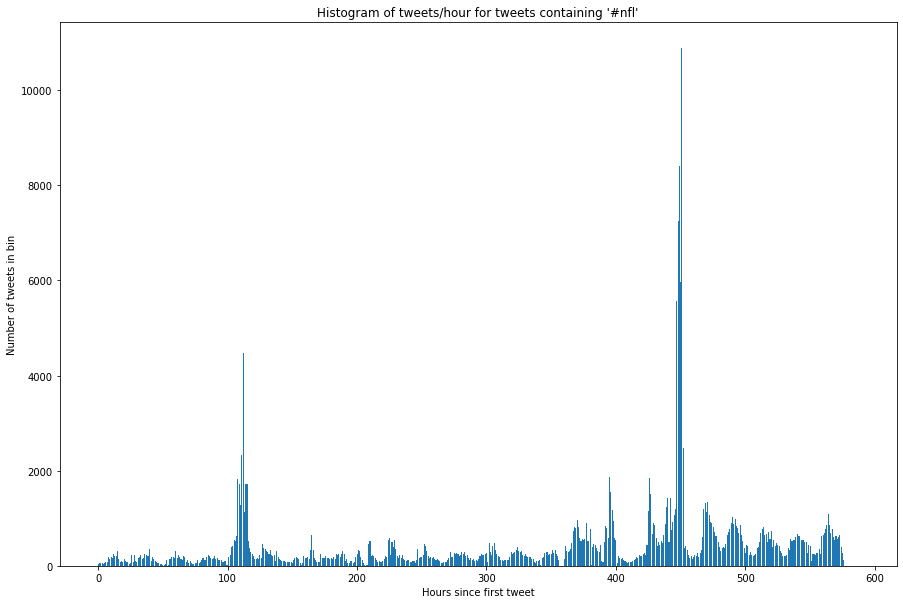

In [ ]:
plotTweetsPerHour('nfl', basic_stats, logscale=0)

Histogram of tweets/hour for '#nfl' tweets:


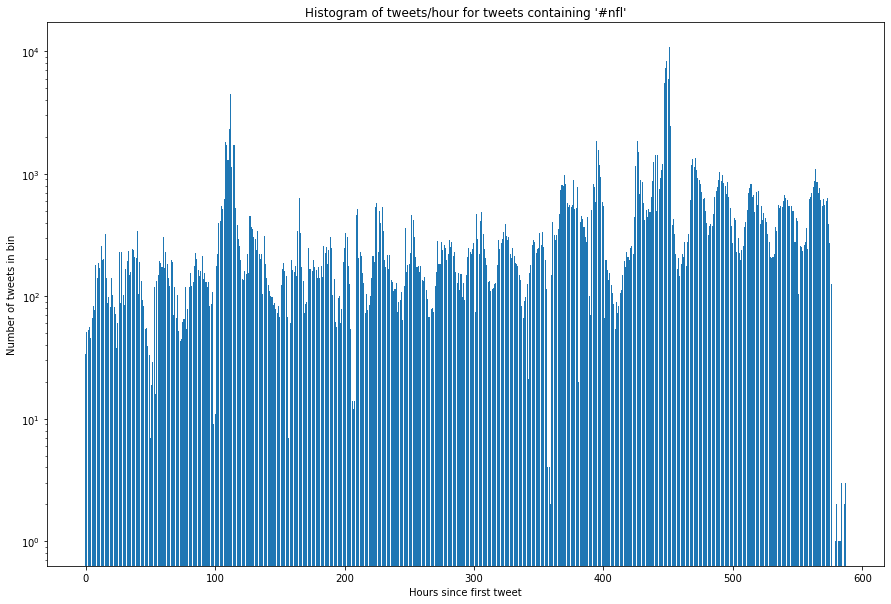

In [ ]:
plotTweetsPerHour('nfl', basic_stats, logscale=1)

Histogram of tweets/hour for '#superbowl' tweets:


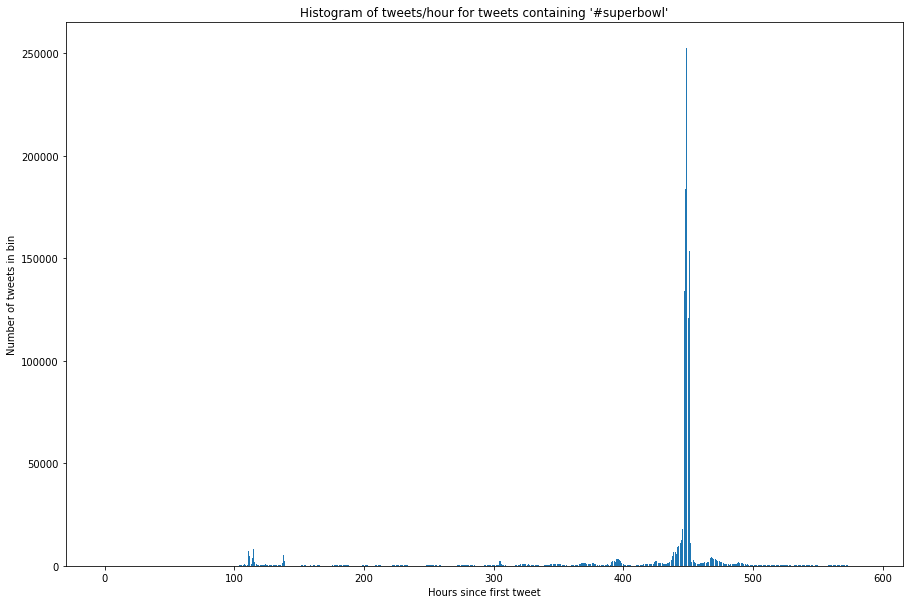

In [ ]:
plotTweetsPerHour('superbowl', basic_stats, logscale=0)

Histogram of tweets/hour for '#superbowl' tweets:


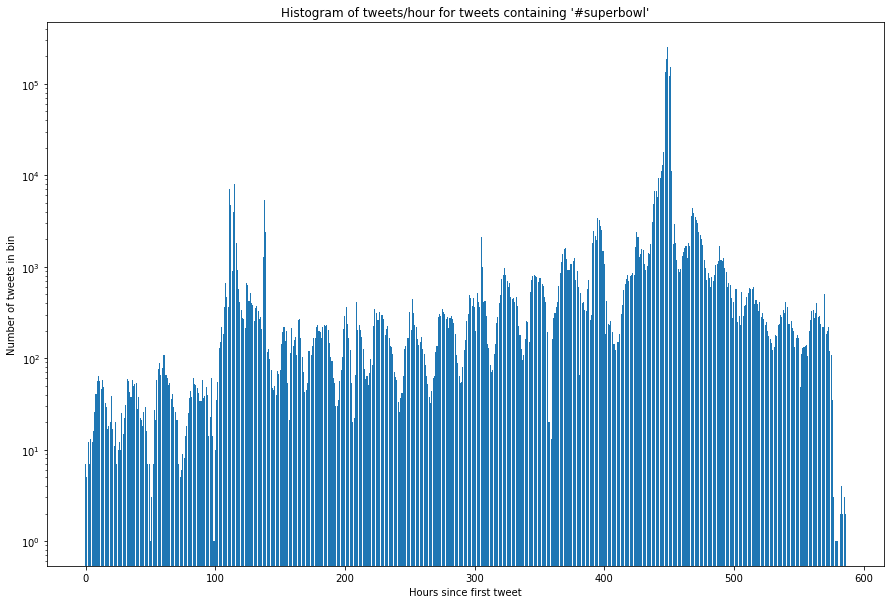

In [ ]:
plotTweetsPerHour('superbowl', basic_stats, logscale=1)

# Linear regression

## Question 3
Create time windows from the data to extract features. Here, use 1-hour time window (00:00 01:00 am, 01:00 - 02:00 am, etc.) and calculate the features in each time window, resulting in <# of hours> data points.
For each hashtag data ﬁle, ﬁt a linear regression model using the following 5 features to predict number of tweets in the next hour, with features extracted from tweet data in the previous hour. The features you should use are:

- Number of tweets
- Total number of retweets
- Sum of the number of followers of the users posting the hashtag
- Maximum number of followers of the users posting the hashtag
- Time of the day (which could take 24 values that represent hours of the day with respect to a given time zone)

For each hashtag, you should train a separate model.

  - Note: High t-value = good, low p-value = good

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.regressionplots import plot_fit
from statsmodels.tools.tools import add_constant

# this function takes basic statistics from datasets and calculates some basic features in time windows.
def basicWindowedFeatures(dataframe):
    data_dict = {}
    pst_tz = pytz.timezone('America/Los_Angeles')
    for key, values in tqdm.tqdm(dataframe.items(), desc='Dataframe key/value pairs'):
        # sort value entries by time, and determine window numbers and initial indexes
        print("\nCurrently processing \'#" + str(key) + "\' tweets")
        values = values.sort_values(by='time')
        starttime_floor = min(values['time']) - min(values['time']) % 3600
        endtime_ceil = max(values['time']) - (max(values['time']) % 3600) + 3600
        window_start = starttime_floor
        window_end = window_start + 3600

        # initialize lists for feature extraction & loop parameters
        start_windows, num_tweets, num_retweets, num_followers, max_followers, hour_of_day = [], [], [], [], [], []
        data_index, tweet_sum, retweet_sum, followers_sum, follower_count = 0, 0, 0, 0, [0]
        data_index_max = len(values['time'])

        # start the loop
        for index, row in values.iterrows():
            added = False
            cur_time = row['time']
            while added == False:
                if cur_time>=window_start and cur_time<window_end:
                    tweet_sum += 1
                    retweet_sum += row['num_retweets']
                    followers_sum += row['num_followers']
                    follower_count.append(row['num_followers'])
                    added = True
                else:
                    num_tweets.append(tweet_sum)
                    num_retweets.append(retweet_sum)
                    num_followers.append(followers_sum)
                    max_followers.append(max(follower_count))
                    hour_of_day.append(datetime.datetime.fromtimestamp(window_start, pst_tz).hour)
                    start_windows.append(window_start)
                    window_start = window_end
                    window_end = window_start + 3600
                    tweet_sum, retweet_sum, followers_sum, follower_count = 0, 0, 0, [0]

        # close the fencepost by appending last window's counts, below
        num_tweets.append(tweet_sum)
        num_retweets.append(retweet_sum)
        num_followers.append(followers_sum)
        max_followers.append(max(follower_count))
        hour_of_day.append(datetime.datetime.fromtimestamp(window_start, pst_tz).hour)
        start_windows.append(window_start)

        # create dataframe
        metric_names = ['window_start', 'num_tweets', 'num_retweets', 'num_followers', 'max_followers', 'hour_of_day']
        next_df = pd.DataFrame({
                'window_start' : start_windows,
                'num_tweets' : num_tweets,
                'num_retweets' : num_retweets,
                'num_followers' : num_followers,
                'max_followers' : max_followers,
                'hour_of_day' : hour_of_day
            }, columns=metric_names)
        data_dict[key] = next_df
    return data_dict


In [ ]:
def linearModelAnalysis(dataframe, df_start_col, df_end_col, report_summary=True):
    for key, values in tqdm.tqdm(dataframe.items()):
        # prepare data for the model
        print("\n","~"*30,"\n", "Regression analysis on \'#"+key+'\' tweets...')
        truth_vals = values['num_tweets'][1:].reset_index().iloc[:,1]
        features = values.iloc[:-1,df_start_col:df_end_col]
        features_addconst = add_constant(features)

        # fitting model
        model = sm.OLS(truth_vals, features_addconst)
        model_fit=model.fit()
        predict_vals = model_fit.predict(features_addconst)

        # report summary
        if (report_summary):
            print(model_fit.summary())

        # calculate mse/rmse
        mse = mean_squared_error(truth_vals, predict_vals)
        rmse = math.sqrt(mse)
        r2 = r2_score(truth_vals, predict_vals)
        print("Model MSE: ",round(mse,3))
        print("Model RMSE: ",round(rmse,3))
        print("Model R-squared: ",round(r2,3))
        
        #plot
        plt.figure(figsize=(15,10))
        plt.ylabel("Tweet Count")
        plt.xlabel("Hour")
        plt.title("OLS Predictions for \'#"+key+'\'')
        plt.plot(predict_vals, truth_vals, 'o')
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = x_vals
        plt.plot(x_vals, y_vals, '--')
        print("\n","~"*30,"\n")

In [ ]:
basic_windowed_stats = basicWindowedFeatures(basic_stats)

Dataframe key/value pairs:   0%|          | 0/6 [00:00<?, ?it/s]


Currently processing '#patriots' tweets


Dataframe key/value pairs:  17%|█▋        | 1/6 [00:31<02:38, 31.61s/it]


Currently processing '#superbowl' tweets


Dataframe key/value pairs:  33%|███▎      | 2/6 [01:58<03:12, 48.20s/it]


Currently processing '#nfl' tweets


Dataframe key/value pairs:  50%|█████     | 3/6 [02:15<01:56, 38.71s/it]


Currently processing '#gopatriots' tweets


Dataframe key/value pairs:  67%|██████▋   | 4/6 [02:16<00:55, 27.59s/it]


Currently processing '#sb49' tweets


Dataframe key/value pairs:  83%|████████▎ | 5/6 [03:09<00:35, 35.27s/it]


Currently processing '#gohawks' tweets


Dataframe key/value pairs: 100%|██████████| 6/6 [03:22<00:00, 33.68s/it]


  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
 33%|███▎      | 2/6 [00:00<00:00, 18.84it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/num


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#patriots' tweets...
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          1.91e-136
Time:                        08:11:02   Log-Likelihood:                -5361.4
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     580   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
100%|██████████| 6/6 [00:00<00:00, 25.95it/s]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#gohawks' tweets...
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           5.01e-78
Time:                        08:11:02   Log-Likelihood:                -4733.0
No. Observations:                 578   AIC:                             9478.
Df Residuals:                     572   BIC:                             9504.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

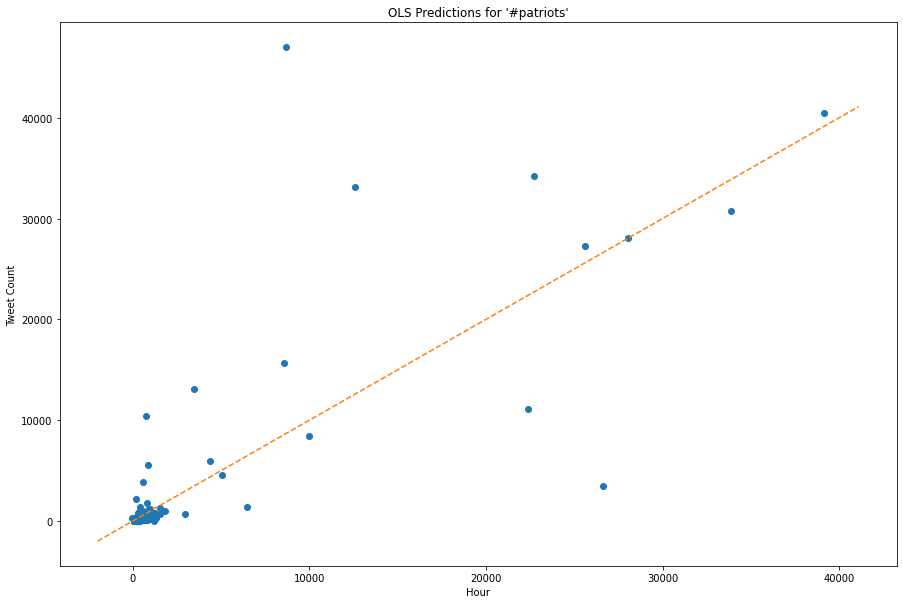

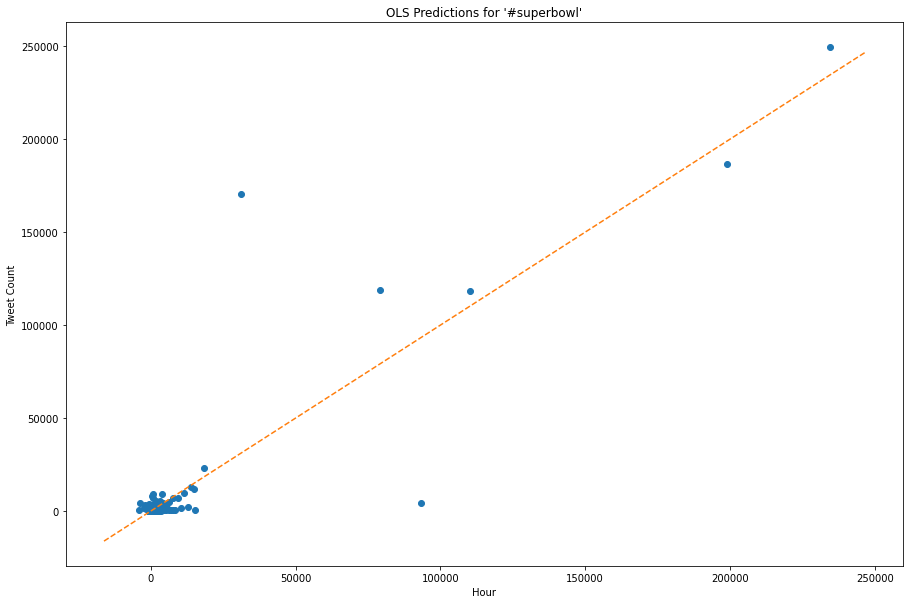

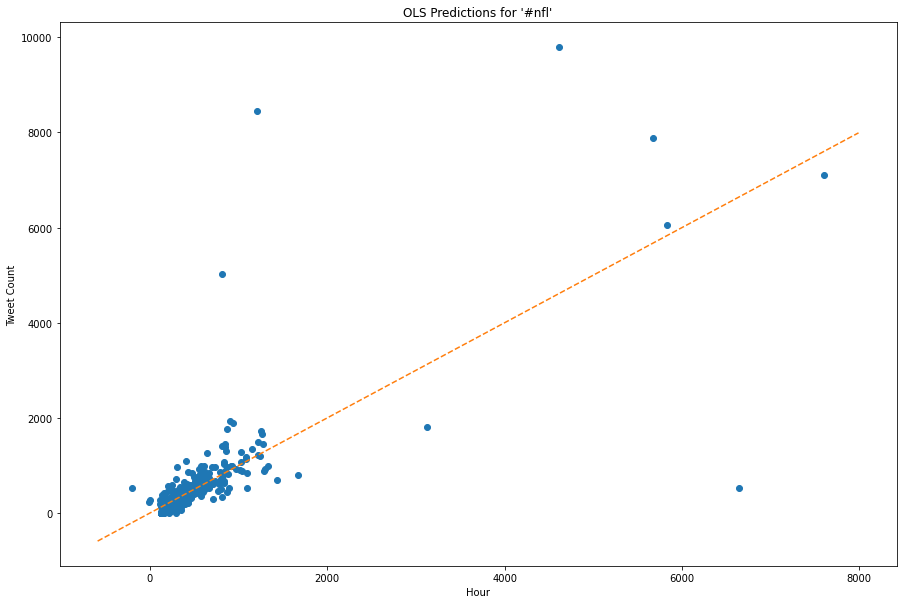

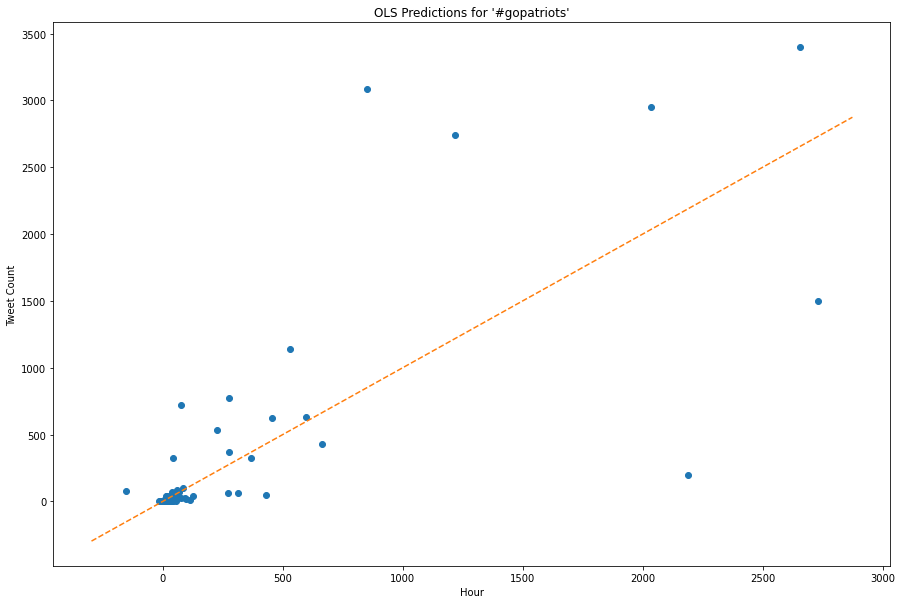

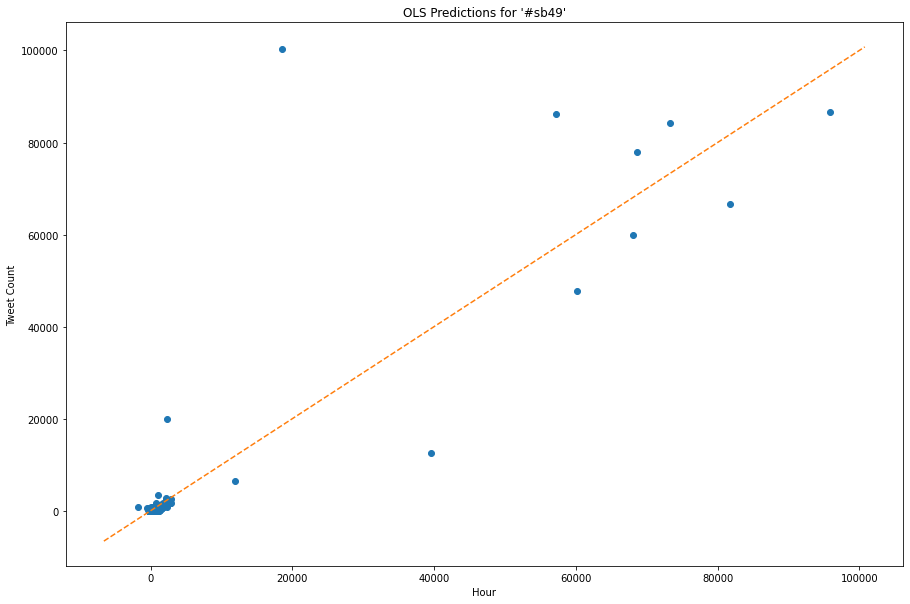

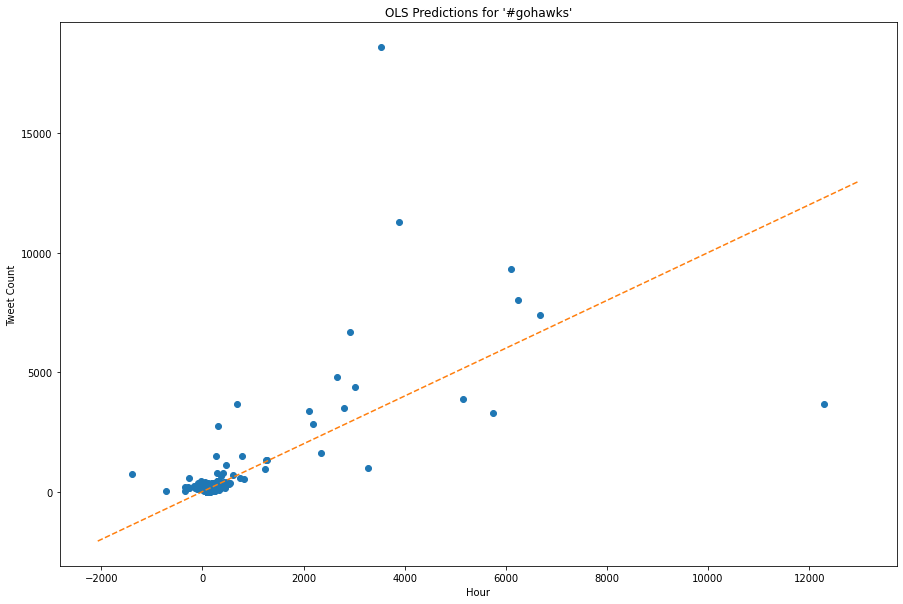

In [ ]:
# alternate regression analysis with constant added.
linearModelAnalysis(basic_windowed_stats, df_start_col=1, df_end_col=6)

# Feature Analysis


## Question 4
Design a regression model using any features from the papers you find or other
new features you may find useful for this problem. Fit your model on the data of each hashtag and
report fitting MSE and significance of features.


In [ ]:
# Designed to be referenced through 'files_dict' for key, value in tqdm(filename_dict.items(), desc="Loading 6 files"):
happy_emoticons = [':)', ':-)', ":')", ':]', '=]']
sad_emoticons = [':(', ':-(', ":'(", ':[', '=[']
months = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
          'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
          
def extraStatisticsParse(filename_dict, combined = False):
    data_dict = {}
    authors = [] # len get the unique author number
    mention_count = [] # sum get the total mention count
    url_count = [] # with url : 1, without url : 0 : sum get the total tweets with url
    passivity = [] 
    case_sensitive_tags = [] # identical case sensitive tags
    co_occurrence_count = [] # with other hash tag : 1, without other hash tag : 0 - sum to get the total time of co-occurrence with other hashtags
    happy_count = [] # with happy emoticons : 1, without happy emoticons : 0
    sad_count = []   # with sad emoticons : 1, without sad emoticons : 0

    # loop through all the data
    for key, value in tqdm.tqdm(filename_dict.items(), desc='File Loop'):
        original_tag = key

        with open(os.path.join(file_path, value+'.txt'), 'r') as file:
            for line in file:

                # load data
                data_line = json.loads(line)
                authors.append(str(data_line['author']['url']))
                mention_count.append(len(data_line['tweet']['entities']['user_mentions']))
                url_exist = 1 if (len(data_line['tweet']['entities']['urls']) or (1 if 'extended_entities' in data_line['tweet'] else 0)) else 0
                url_count.append(url_exist)

                # passivity factors
                current_date = data_line['citation_date']
                creation_date = data_line['tweet']['user']['created_at'].split()
                create_year = creation_date[-1]
                create_month = months[creation_date[1]]
                create_day = creation_date[2]
                dt = datetime.datetime.strptime("{0}-{1}-{2}".format(create_year, create_month, create_day), '%Y-%m-%d') # change to regular date
                create_date = time.mktime(dt.timetuple())
                interval_days = (current_date - create_date) / 86400.
                total_tweets = data_line['tweet']['user']['statuses_count']
                passivity.append(interval_days/(1. + total_tweets))

                # count happy/sad emoticons
                happy_count.append(0 if all([data_line['tweet']['text'].count(emote) == 0 for emote in happy_emoticons]) else 1)
                sad_count.append(0 if all([data_line['tweet']['text'].count(emote) == 0 for emote in sad_emoticons]) else 1)

                # tag calculation
                co_occurrence = 0
                tags = []
                for tag in data_line['tweet']['entities']['hashtags']:
                    if (str(tag['text']).lower() == original_tag.lower()):
                        tags.append(str(tag['text']))
                    else:
                        co_occurrence = 1
                co_occurrence_count.append(co_occurrence)
                case_sensitive_tags.append(tags)

        if not combined:
            # create a pandas dataframe with this information
            metric_names = ['authors', 'mention_count', 'url_count', 'case_sensitive_tags', 'co_occurrence_time', 'passivity', 'happy_count', 'sad_count']
            next_df = pd.DataFrame({
                'authors' : authors,
                'mention_count' : mention_count,
                'url_count' : url_count,
                'case_sensitive_tags' : case_sensitive_tags,
                'co_occurrence_time' : co_occurrence_count,
                'passivity': passivity,
                'happy_count': happy_count,
                'sad_count': sad_count
            }, columns=metric_names)
            data_dict[key] = next_df

            # reset counters for non-combined processing's next loop
            authors = [] # len get the unique author number
            mention_count = [] # sum get the total mention count
            url_count = [] # with url : 1, without url : 0 : sum get the total tweets with url
            passivity = [] 
            case_sensitive_tags = [] # identical case sensitive tags
            co_occurrence_count = [] # with other hash tag : 1, without other hash tag : 0 - sum to get the total time of co-occurrence with other hashtags
            happy_count = [] # with happy emoticons : 1, without happy emoticons : 0
            sad_count = []   # with sad emoticons : 1, without sad emoticons : 0

    if combined:
        # create a pandas dataframe with this information
        metric_names = ['authors', 'mention_count', 'url_count', 'case_sensitive_tags', 'co_occurrence_time', 'passivity', 'happy_count', 'sad_count']
        next_df = pd.DataFrame({
            'authors' : authors,
            'mention_count' : mention_count,
            'url_count' : url_count,
            'case_sensitive_tags' : case_sensitive_tags,
            'co_occurrence_time' : co_occurrence_count,
            'passivity': passivity,
            'happy_count': happy_count,
            'sad_count': sad_count
        }, columns=metric_names)
        data_dict['aggregate_tweets'] = next_df
    return data_dict

In [ ]:
extra_stats = extraStatisticsParse(filename_dict)

File Loop: 100%|██████████| 6/6 [04:25<00:00, 44.25s/it]


In [ ]:
# Determine new features to fit model from paper or other sources
import statsmodels.api as sm

# this function takes basic statistics from datasets and calculates some basic features in time windows.
def extendedWindowedFeatures(data, window_length=3600, start_time=0, end_time=10000000000, begin=True, end=True):
    data_dict = {}
    pst_tz = pytz.timezone('America/Los_Angeles')
    for key, values in tqdm.tqdm(data.items(), desc='data key/value pairs'):
        # sort value entries by time, and determine window numbers and initial indexes
        print("\nCurrently processing \'#" + str(key) + "\' tweets")
        values = values.sort_values(by='time')
        starttime_floor = min(values['time']) if begin == True else start_time
        endtime_ceil = max(values['time']) if end == True else end_time

        window_start = starttime_floor
        window_end = window_start + window_length
        

        # initialize lists for feature extraction & loop parameters
        start_windows, num_tweets, num_retweets, num_followers, max_followers, hour_of_day = [], [], [], [], [], []
        data_index, tweet_sum, retweet_sum, followers_sum, follower_count = 0, 0, 0, 0, [0]
        data_index_max = len(values['time'])

        # Extra features
        unique_authors = []
        mention_counts = []
        url_ratio = []
        case_sensitive_count = []
        co_occurrence_times = []
        average_passivity = []
        happy_count = []
        sad_count = []

        authors = set()
        mention_count = 0
        url_count = 0
        tags = set()
        co_occurrence_count = 0
        happy_tweet = 0
        sad_tweet = 0
        passivity = 0.

        for index, row in values.iterrows():
            added = False
            cur_time = row['time']
            if (cur_time < start_time):
                continue
            if (cur_time > end_time):
                break
            while added == False:
                if cur_time >= window_start and cur_time < window_end:
                    tweet_sum += 1
                    retweet_sum += row['num_retweets']
                    followers_sum += row['num_followers']
                    follower_count.append(row['num_followers'])
                    authors.add(row['authors'])
                    mention_count += row['mention_count']
                    url_count += row['url_count']
                    for tag in row['case_sensitive_tags']:
                        tags.add(tag)
                    co_occurrence_count += row['co_occurrence_time']
                    passivity += row['passivity']
                    happy_tweet += row['happy_count']
                    sad_tweet += row['sad_count']
                    added = True
                else:
                    num_tweets.append(tweet_sum)
                    num_retweets.append(retweet_sum)
                    num_followers.append(followers_sum)
                    max_followers.append(max(follower_count))
                    hour_of_day.append(datetime.datetime.fromtimestamp(window_start, pst_tz).hour)
                    start_windows.append(window_start)
                    unique_authors.append(len(authors))
                    mention_counts.append(mention_count)
                    url_ratio.append(float(url_count)/tweet_sum if tweet_sum != 0 else 0)
                    case_sensitive_count.append(len(tags))
                    co_occurrence_times.append(co_occurrence_count)
                    average_passivity.append(passivity/tweet_sum if tweet_sum != 0 else 0)
                    happy_count.append(happy_tweet)
                    sad_count.append(sad_tweet)

                    window_start = window_end
                    window_end = window_start + window_length
                    tweet_sum, retweet_sum, followers_sum, follower_count = 0, 0, 0, [0]
                    authors = set()
                    mention_count = 0
                    url_count = 0
                    tags = set()
                    co_occurrence_count = 0
                    happy_tweet = 0
                    sad_tweet = 0
                    passivity = 0.

        # close the fencepost by appending last window's counts, below
        if (added == True):
            num_tweets.append(tweet_sum)
            num_retweets.append(retweet_sum)
            num_followers.append(followers_sum)
            max_followers.append(max(follower_count))
            hour_of_day.append(datetime.datetime.fromtimestamp(window_start, pst_tz).hour)
            start_windows.append(window_start)
            unique_authors.append(len(authors))
            mention_counts.append(mention_count)
            url_ratio.append(float(url_count)/tweet_sum if tweet_sum != 0 else 0)
            case_sensitive_count.append(len(tags))
            co_occurrence_times.append(co_occurrence_count)
            average_passivity.append(passivity/tweet_sum if tweet_sum != 0 else 0)
            happy_count.append(happy_tweet)
            sad_count.append(sad_tweet)
        
        while (window_end < endtime_ceil):
            window_start = window_end
            window_end = window_start + window_length
            num_tweets.append(0)
            num_retweets.append(0)
            num_followers.append(0)
            max_followers.append(0)
            hour_of_day.append(datetime.datetime.fromtimestamp(window_start, pst_tz).hour)
            start_windows.append(window_start)
            unique_authors.append(0)
            mention_counts.append(0)
            url_ratio.append(0)
            case_sensitive_count.append(0)
            co_occurrence_times.append(0)
            average_passivity.append(0)
            happy_count.append(0)
            sad_count.append(0)


        print(num_tweets)
        #create dataframe
        metric_names = ['window_start', 'num_tweets', 'num_retweets', 'num_followers', 'max_followers', 'hour_of_day', 'unique_authors', 
                        'mention_count', 'url_ratio', 'case_sensitive_count', 'co_occurrence_time', 'average_passivity', 'happy_count', 'sad_count']
        next_df = pd.DataFrame({
                'window_start' : start_windows,
                'num_tweets' : num_tweets,
                'num_retweets' : num_retweets,
                'num_followers' : num_followers,
                'max_followers' : max_followers,
                'hour_of_day' : hour_of_day,
                'unique_authors' : unique_authors,
                'mention_count' : mention_counts,
                'url_ratio' : url_ratio,
                'case_sensitive_count' : case_sensitive_count,
                'co_occurrence_time' : co_occurrence_times,
                'average_passivity': average_passivity,
                'happy_count': happy_count,
                'sad_count': sad_count
            }, columns=metric_names)
        data_dict[key] = next_df
    return data_dict

In [ ]:
# combine basic features and extended features for all hashtags in analysis
combined_stats = {}
for key in filename_dict:
    combined_stats[key] = pd.concat([basic_stats[key], extra_stats[key]], axis=1)
extended_windowed_stats = extendedWindowedFeatures(combined_stats)

data key/value pairs:   0%|          | 0/6 [00:00<?, ?it/s]


Currently processing '#patriots' tweets


data key/value pairs:  17%|█▋        | 1/6 [01:18<06:33, 78.71s/it]

[19, 18, 29, 21, 42, 56, 74, 113, 221, 196, 140, 161, 137, 179, 130, 118, 66, 68, 57, 56, 78, 74, 41, 18, 17, 36, 38, 37, 60, 50, 105, 138, 196, 162, 92, 140, 157, 116, 178, 96, 103, 90, 140, 97, 57, 63, 29, 4, 24, 7, 4, 13, 34, 25, 48, 166, 184, 216, 147, 240, 206, 199, 195, 207, 89, 141, 105, 87, 94, 64, 64, 41, 17, 14, 18, 33, 61, 29, 45, 92, 116, 172, 96, 146, 137, 150, 154, 161, 112, 149, 179, 104, 129, 93, 86, 50, 63, 44, 7, 7, 93, 148, 397, 525, 606, 758, 521, 1023, 949, 783, 929, 5511, 5954, 4527, 13095, 8398, 1387, 763, 587, 401, 216, 155, 198, 211, 345, 365, 560, 885, 836, 732, 412, 602, 502, 435, 360, 385, 193, 258, 385, 251, 180, 159, 116, 98, 62, 54, 56, 74, 143, 116, 173, 248, 294, 318, 149, 241, 12, 23, 204, 221, 155, 217, 172, 175, 2136, 1263, 436, 253, 126, 115, 189, 377, 607, 465, 485, 498, 439, 427, 337, 377, 348, 312, 353, 467, 457, 545, 343, 339, 273, 161, 126, 131, 63, 37, 61, 68, 143, 141, 577, 481, 662, 540, 331, 210, 223, 75, 57, 34, 294, 545, 672, 384, 338, 21

data key/value pairs:  33%|███▎      | 2/6 [04:55<08:00, 120.14s/it]

[8, 6, 12, 10, 11, 10, 19, 31, 55, 51, 63, 49, 48, 60, 46, 28, 22, 20, 16, 31, 28, 16, 15, 14, 8, 15, 7, 13, 23, 16, 25, 41, 53, 64, 33, 41, 57, 54, 52, 47, 30, 32, 25, 20, 17, 25, 32, 9, 12, 2, 1, 5, 13, 22, 26, 70, 82, 81, 71, 82, 106, 102, 67, 55, 44, 59, 34, 39, 31, 22, 20, 17, 7, 5, 6, 8, 12, 12, 23, 24, 45, 41, 39, 60, 52, 51, 45, 46, 22, 46, 58, 29, 43, 44, 37, 18, 23, 60, 6, 4, 18, 34, 89, 116, 185, 217, 179, 523, 590, 435, 581, 9326, 2417, 1090, 5215, 6969, 1469, 794, 512, 392, 307, 255, 285, 216, 849, 463, 447, 499, 373, 385, 220, 393, 366, 293, 265, 298, 824, 648, 7038, 704, 122, 127, 82, 80, 39, 42, 51, 44, 78, 61, 89, 156, 202, 220, 136, 198, 23, 24, 167, 202, 112, 179, 155, 115, 306, 231, 150, 91, 61, 43, 48, 63, 135, 103, 113, 158, 167, 171, 246, 210, 194, 199, 153, 254, 219, 234, 203, 193, 139, 105, 83, 66, 36, 31, 33, 37, 61, 74, 163, 190, 329, 336, 207, 148, 123, 28, 25, 26, 136, 389, 209, 223, 203, 152, 114, 62, 67, 61, 51, 86, 84, 118, 233, 362, 320, 226, 306, 290, 

data key/value pairs:  50%|█████     | 3/6 [05:37<04:50, 96.68s/it] 

[55, 51, 54, 60, 57, 73, 75, 135, 163, 144, 200, 214, 212, 219, 210, 301, 86, 88, 90, 110, 131, 95, 69, 50, 52, 203, 96, 109, 234, 68, 119, 207, 225, 201, 102, 193, 271, 213, 241, 336, 134, 122, 199, 108, 76, 87, 57, 32, 51, 16, 10, 20, 111, 35, 39, 171, 172, 198, 157, 233, 260, 167, 235, 182, 95, 209, 191, 103, 112, 66, 96, 78, 48, 48, 41, 73, 126, 36, 82, 78, 147, 147, 122, 136, 235, 168, 199, 187, 111, 210, 195, 119, 163, 113, 143, 93, 69, 114, 59, 5, 117, 216, 281, 364, 512, 576, 432, 1101, 1945, 1490, 1281, 5031, 1799, 1133, 1898, 1230, 437, 317, 265, 240, 144, 145, 147, 142, 203, 179, 265, 465, 345, 350, 239, 302, 274, 315, 181, 248, 129, 147, 306, 167, 137, 124, 95, 100, 106, 69, 85, 77, 84, 74, 88, 153, 171, 208, 111, 154, 5, 15, 163, 175, 136, 170, 182, 130, 562, 528, 236, 163, 95, 83, 78, 199, 198, 137, 176, 184, 183, 153, 167, 151, 156, 157, 171, 216, 213, 276, 177, 229, 233, 383, 120, 135, 80, 52, 97, 61, 105, 60, 153, 172, 320, 333, 222, 137, 123, 12, 13, 14, 159, 455, 488

data key/value pairs:  67%|██████▋   | 4/6 [05:41<02:17, 68.95s/it]

[1, 1, 0, 2, 1, 2, 1, 1, 1, 4, 2, 3, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 2, 3, 2, 4, 2, 1, 6, 2, 3, 4, 2, 1, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 5, 5, 1, 5, 7, 7, 6, 3, 5, 11, 6, 6, 3, 2, 2, 2, 0, 0, 1, 0, 1, 1, 3, 4, 9, 5, 7, 7, 4, 6, 10, 8, 9, 7, 10, 8, 11, 14, 7, 8, 4, 3, 0, 2, 9, 13, 40, 42, 58, 63, 40, 73, 84, 99, 81, 718, 630, 328, 773, 428, 52, 16, 19, 5, 6, 4, 10, 9, 10, 7, 8, 9, 18, 20, 8, 12, 4, 8, 8, 9, 3, 7, 10, 13, 4, 5, 9, 1, 0, 4, 1, 1, 2, 1, 8, 9, 8, 11, 5, 7, 1, 0, 12, 9, 6, 10, 6, 9, 19, 13, 4, 3, 2, 0, 4, 3, 5, 2, 7, 7, 4, 8, 2, 4, 8, 4, 7, 7, 28, 7, 8, 7, 5, 2, 3, 3, 0, 0, 0, 0, 0, 1, 4, 1, 5, 8, 3, 3, 2, 0, 1, 2, 5, 11, 12, 15, 17, 3, 6, 3, 0, 3, 3, 2, 4, 7, 13, 5, 10, 11, 10, 13, 7, 6, 7, 7, 17, 21, 19, 4, 6, 6, 6, 1, 2, 0, 1, 2, 1, 5, 6, 3, 5, 4, 3, 6, 43, 15, 9, 14, 8, 16, 16, 6, 13, 5, 2, 4, 3, 2, 2, 2, 2, 4, 5, 8, 18, 6, 4, 13, 7, 7, 15, 9, 8, 13, 16, 4, 4, 5, 1, 0, 2, 0, 3, 5, 4, 3, 5, 8, 14, 7, 10, 9, 9, 6, 12, 7, 9, 36, 10, 12, 10, 7, 3

data key/value pairs:  83%|████████▎ | 5/6 [07:54<01:28, 88.20s/it]

[1, 0, 2, 2, 2, 1, 0, 3, 0, 8, 93, 104, 1, 1, 1, 23, 37, 55, 53, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 6, 1, 1, 2, 1, 6, 1, 4, 0, 2, 3, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2, 1, 1, 0, 4, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 4, 6, 3, 7, 15, 3, 7, 226, 102, 79, 113, 234, 80, 54, 44, 25, 15, 9, 8, 2, 10, 15, 13, 44, 28, 51, 34, 33, 39, 29, 14, 26, 12, 12, 14, 15, 16, 17, 8, 10, 1, 2, 0, 2, 2, 4, 9, 14, 15, 23, 7, 17, 0, 4, 15, 17, 12, 25, 13, 14, 27, 20, 12, 10, 1, 1, 2, 1, 6, 5, 8, 9, 11, 11, 10, 14, 24, 12, 14, 21, 23, 19, 12, 9, 14, 18, 5, 6, 2, 3, 0, 2, 1, 5, 6, 14, 21, 24, 14, 13, 10, 8, 2, 2, 9, 32, 12, 42, 30, 18, 19, 12, 6, 11, 0, 5, 1, 6, 18, 23, 22, 18, 27, 26, 30, 29, 22, 20, 25, 24, 24, 18, 18, 16, 12, 3, 5, 3, 2, 1, 1, 7, 4, 22, 19, 16, 21, 33, 59, 25, 31, 18, 32, 17, 26, 38, 30, 23, 10, 12, 6, 3, 3, 5, 3, 7, 10, 42, 67, 94, 122, 66, 73, 84, 100, 59, 41, 41, 48, 36, 49, 33, 28, 19, 6, 6, 15, 1

data key/value pairs: 100%|██████████| 6/6 [08:25<00:00, 84.19s/it]

[29, 13, 14, 9, 24, 29, 43, 71, 127, 140, 122, 116, 125, 162, 131, 123, 85, 76, 68, 122, 126, 94, 80, 37, 10, 19, 12, 13, 17, 23, 40, 89, 155, 133, 75, 151, 164, 147, 151, 133, 101, 150, 129, 158, 91, 82, 82, 20, 56, 9, 4, 4, 22, 31, 71, 277, 436, 454, 327, 418, 450, 347, 380, 348, 241, 377, 385, 235, 220, 182, 151, 98, 53, 36, 16, 19, 18, 15, 39, 111, 182, 244, 164, 359, 354, 311, 278, 264, 173, 300, 254, 353, 272, 276, 309, 246, 276, 124, 67, 3, 75, 133, 334, 792, 1093, 1468, 1316, 3649, 6682, 3892, 4393, 18606, 3673, 1597, 1489, 1309, 964, 695, 571, 350, 226, 139, 74, 86, 94, 94, 180, 282, 362, 440, 245, 374, 363, 333, 250, 257, 132, 196, 204, 218, 195, 226, 133, 120, 79, 33, 26, 23, 27, 26, 67, 110, 150, 177, 103, 158, 5, 19, 144, 162, 103, 216, 281, 229, 258, 201, 157, 89, 44, 19, 22, 24, 24, 27, 49, 71, 67, 88, 82, 87, 112, 83, 85, 122, 161, 182, 185, 192, 150, 124, 77, 70, 31, 15, 14, 12, 12, 15, 49, 76, 138, 150, 85, 66, 67, 8, 10, 13, 77, 153, 151, 172, 185, 178, 132, 71, 40, 

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
 50%|█████     | 3/6 [00:00<00:00, 27.10it/s]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#patriots' tweets...
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          5.05e-172
Time:                        08:23:55   Log-Likelihood:                -5256.1
No. Observations:                 586   AIC:                         1.054e+04
Df Residuals:                     572   BIC:                         1.060e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          1.85e-225
Time:                        08:23:55   Log-Likelihood:                -5576.1
No. Observations:                 582   AIC:                         1.118e+04
Df Residuals:                     568   BIC:                         1.124e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.8784 

100%|██████████| 6/6 [00:00<00:00, 26.48it/s]


                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     66.85
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          4.52e-105
Time:                        08:23:55   Log-Likelihood:                -4650.5
No. Observations:                 578   AIC:                             9329.
Df Residuals:                     564   BIC:                             9390.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -91.3933 

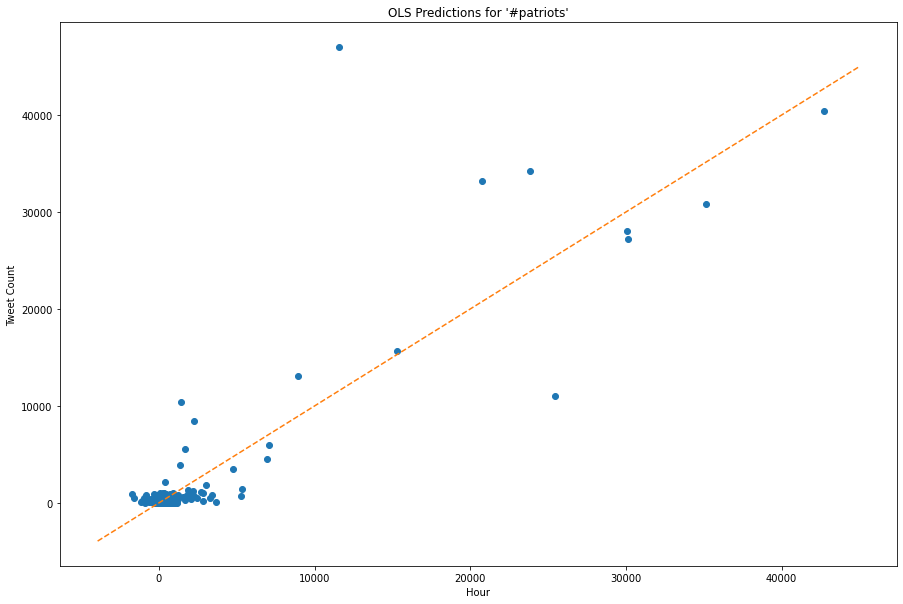

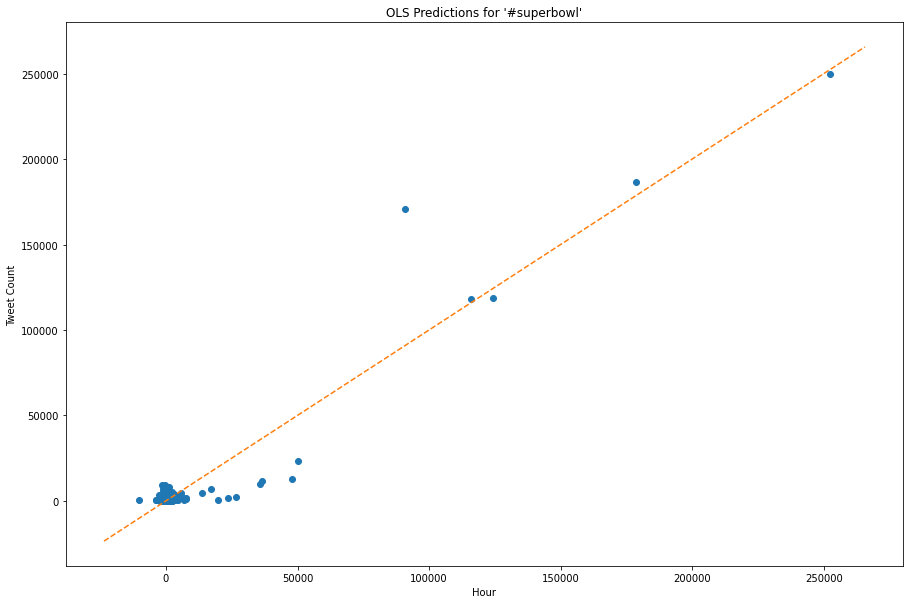

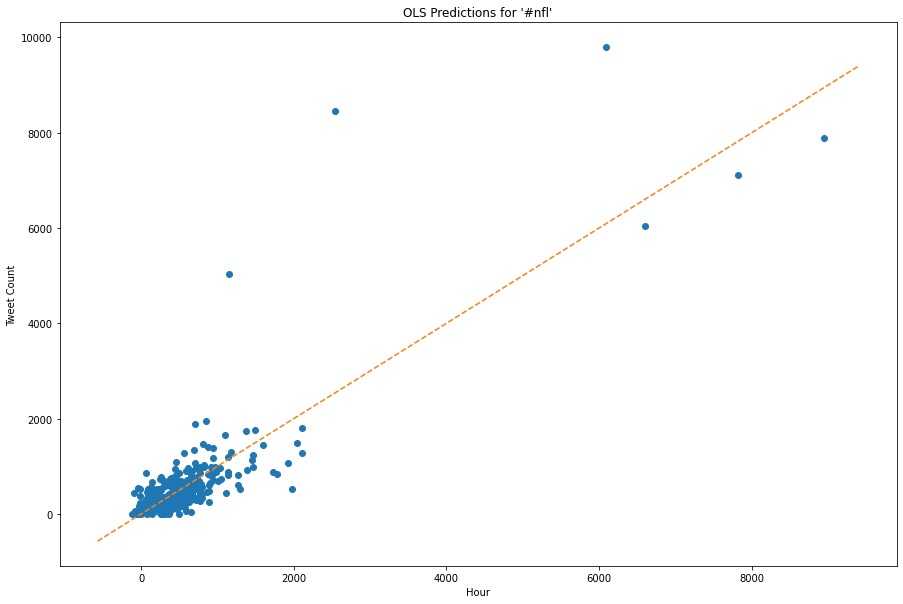

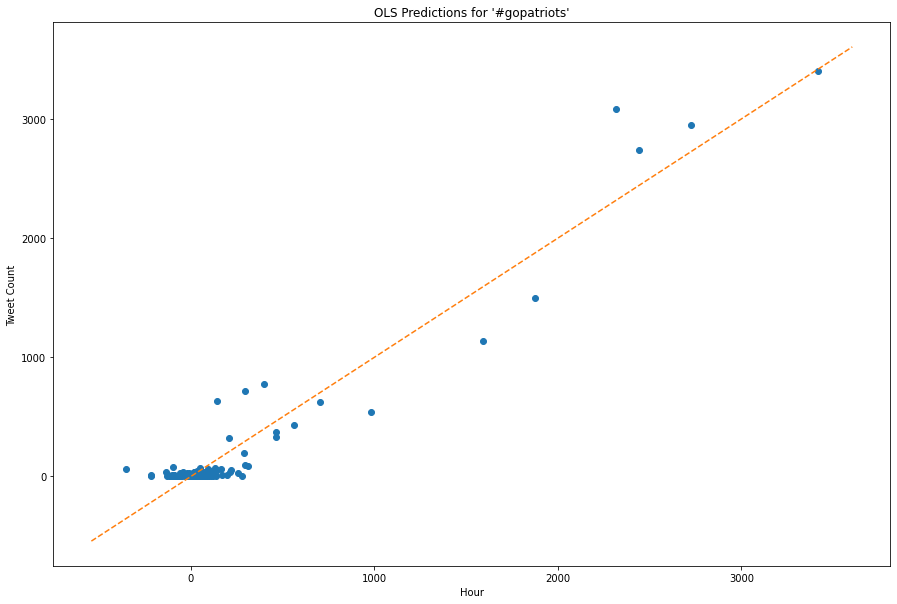

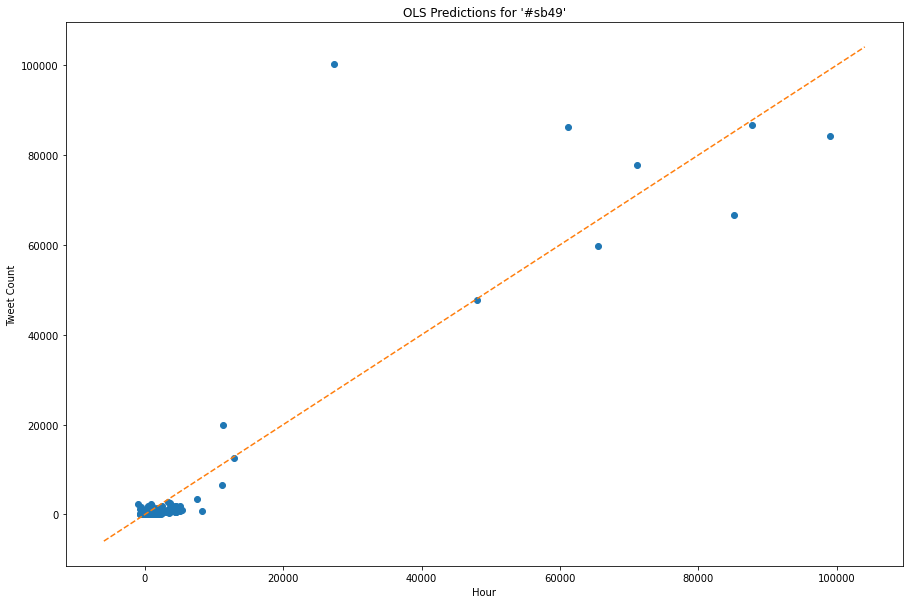

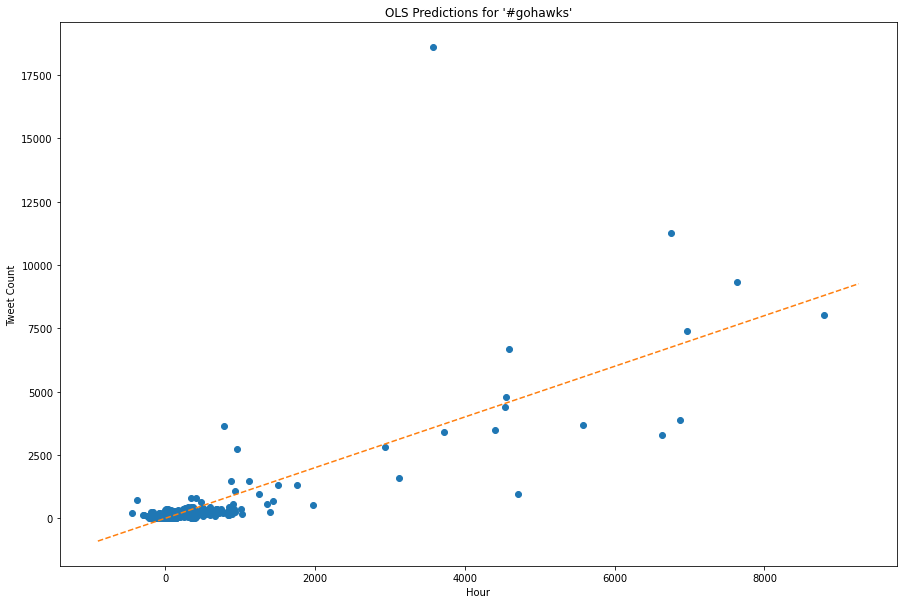

In [ ]:
linearModelAnalysis(extended_windowed_stats, df_start_col=1, df_end_col=14)

(Q4)**Interpreting the results**
see this link:
https://stats.idre.ucla.edu/stata/output/regression-analysis/

\#Superbowl Top 3 significant features:

  - unique_authors; P>|t| = 0.0, confidence interval doesn't include 0
  - co_occurance_time; P>|t| = 0.0, confidence interval doesn't include 0
  - sad_count; P>|t| = 0.0, confidence interval doesn't include 0

\#Superbowl Alternate significant features:

  - max_followers; P>|t| = 0.0, confidence interval close to 0

\#Superbowl Insignificant features:

  - num_retweets / max_followers / hours_of_day / mention_count / url_ratio / case_sensitive_count / average_passivity / happy_count

## Question 5
For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.

Do the regression coefficients agree with the trends in the plots? If not, why?

In [ ]:
# plot the top 3 features vs the predictants passed to this function featureList keys must corresond to the feature names in 'extendedWindowedStats'
def plotTopFeatures(feature_list_dict, features_dict):
    for key, values in tqdm.tqdm(features_dict.items()):
        print("\n","~"*30,"\n", "Plotting top features for \'#"+key+'\' tweets...')
        truth_vals = values['num_tweets'][1:].reset_index().iloc[:,1]
        feature_list = feature_list_dict[key]
        k = len(feature_list)
        if k != 3:
            print("featureList incorrect length (!=3)")
            return
        plt.figure(figsize=(20,5))
        for i,feature in enumerate(feature_list):
            plt.subplot(1,k,i+1)
            feature_vals = values[feature].iloc[:-1]
            plt.ylabel("Current " + feature + " value")
            plt.xlabel("Next hour tweet count")
            plt.plot(truth_vals, feature_vals, 'o')

In [ ]:
top_features_dict = {
    "patriots": ['num_followers', 'max_followers', 'happy_count'],
    "superbowl": ['num_tweets', 'num_retweets', 'co_occurrence_time'],
    "nfl": ['unique_authors', 'mention_count', 'co_occurrence_time'],
    "gopatriots": ['mention_count', 'co_occurrence_time', 'happy_count'],
    "sb49": ['num_tweets', 'mention_count', 'happy_count'],
    "gohawks": ['num_tweets', 'co_occurrence_time', 'sad_count']
}

# confirm that our dictionary keys correspond
for key, value in extended_windowed_stats.items():
    print(key)

patriots
superbowl
nfl
gopatriots
sb49
gohawks



 50%|█████     | 3/6 [00:00<00:00, 24.47it/s]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#patriots' tweets...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#superbowl' tweets...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#nfl' tweets...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#gopatriots' tweets...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#sb49' tweets...




100%|██████████| 6/6 [00:00<00:00, 24.35it/s]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Plotting top features for '#gohawks' tweets...


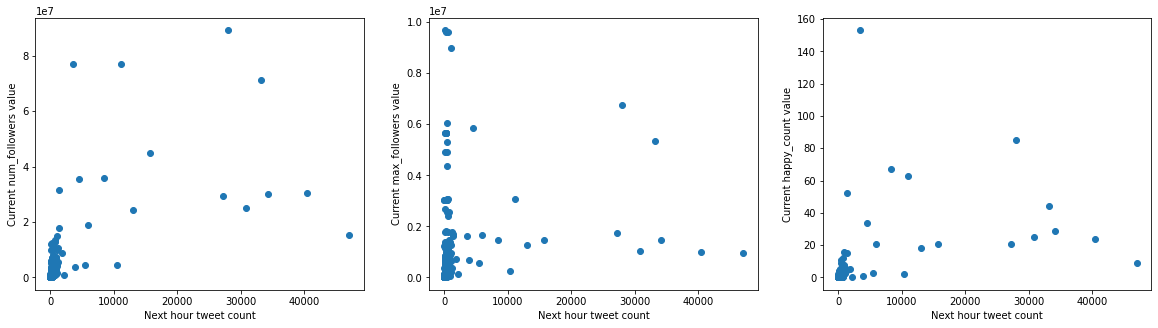

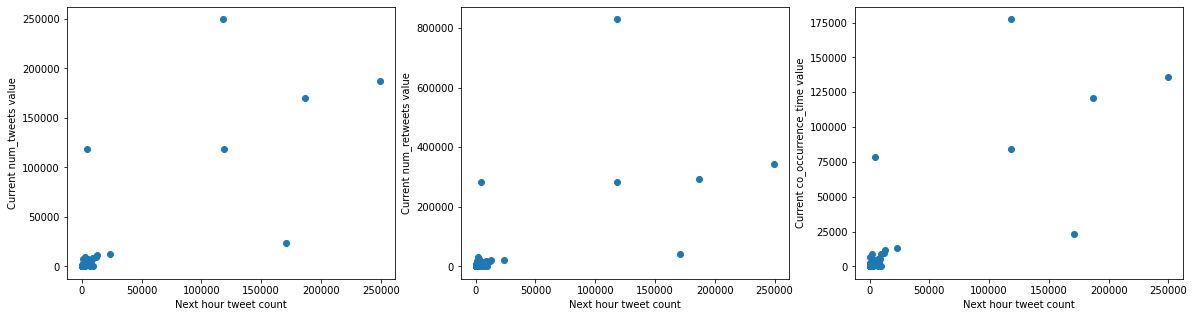

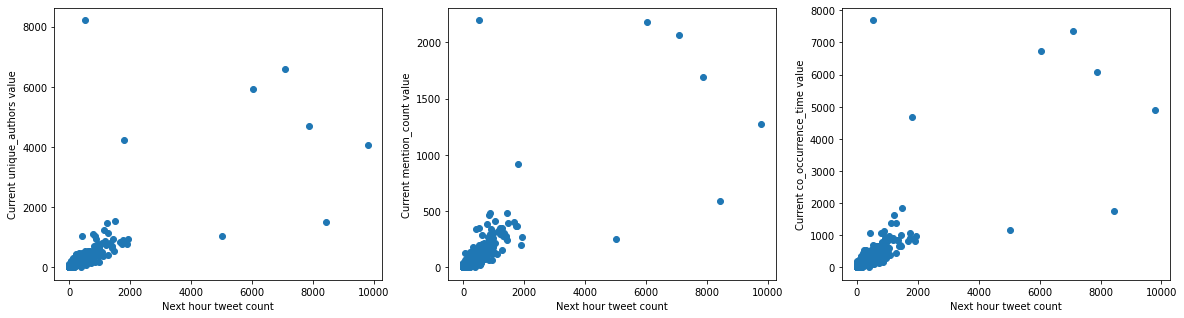

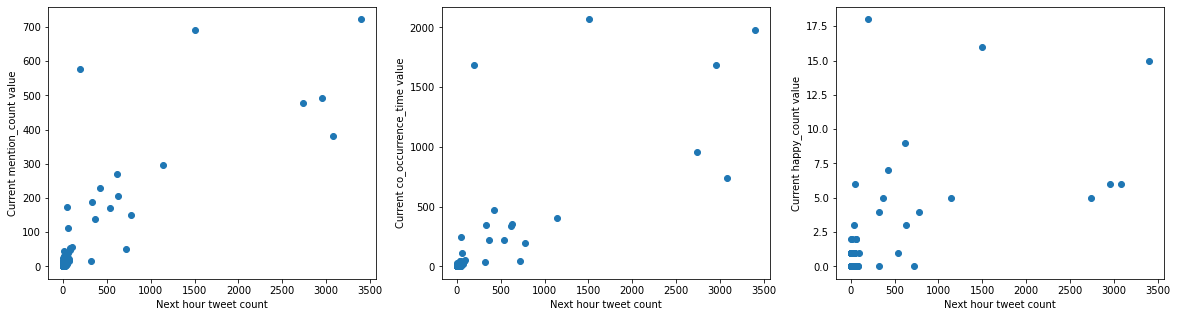

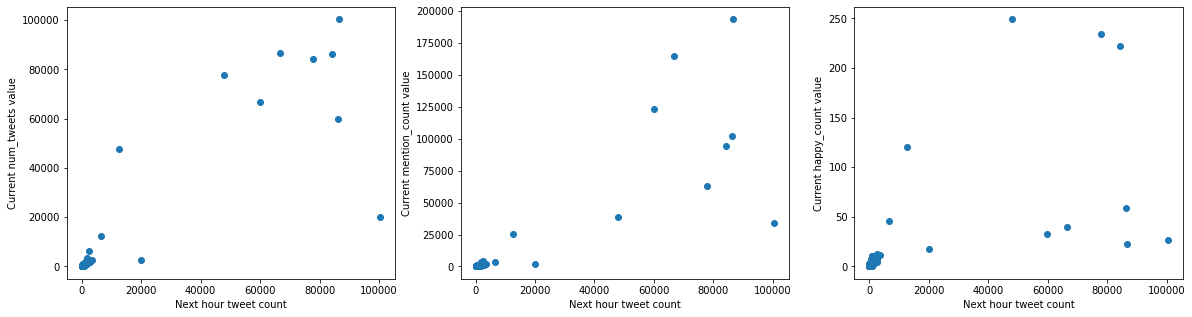

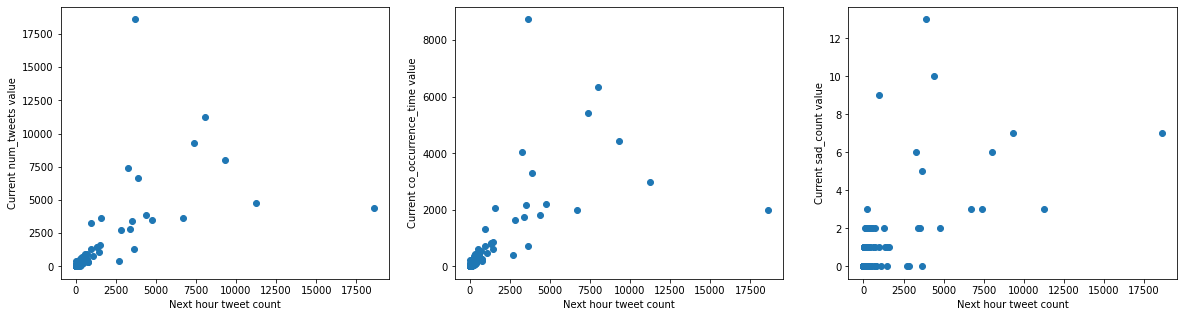

In [ ]:
plotTopFeatures(top_features_dict, extended_windowed_stats)

# Piece-wise linear regression

## Question 6
We deﬁne three time periods and their corresponding window length as follows:
1. Before Feb. 1, 8:00 a.m.: 1-hour window
2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
3. After Feb. 1, 8:00 p.m.: 1-hour window

For each hashtag, train 3 regression models, one for each of these time periods (the times are all in PST). Report the MSE and R-squared score for each case.

In [ ]:
import statsmodels.api as sm

"""
data type dictionary :
        key type str : hashtag
        value type pandas.DataFrame : features
start_date type str : start date of the second period
end_date type str : end date of the second period
regression type function :  function of some regression model analysis
                            if other regression function paramters fit, can call this function
                            can use default paramters to make the function fit
kwargs : parameters for regression function
"""

def regressionAnalysisForPeriods(data, start_date="2015-02-01 08:00:00", end_date="2015-02-01 20:00:00", regression=linearModelAnalysis, **kwargs):
    start_time = time.mktime(time.strptime(start_date,'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime(end_date,'%Y-%m-%d %H:%M:%S'))
    data_before = extendedWindowedFeatures(data, end_time=start_time, begin=True, end=False)
    data_between = extendedWindowedFeatures(data, window_length=300, start_time=start_time, end_time=end_time, begin=False, end=False)
    data_after = extendedWindowedFeatures(data, start_time=end_time, begin=False, end=True)

    start_col = kwargs['df_start_col'] if 'df_start_col' in kwargs else 2
    end_col = kwargs['df_end_col'] if 'df_end_col' in kwargs else 14
    report_summary = kwargs['report_summary'] if 'report_summary' in kwargs else False
    print("\nTime before {0}\n".format(start_date))
    regression(data_before, df_start_col=start_col, df_end_col=end_col, report_summary=report_summary)
    print("\nTime between {0} and {1}\n".format(start_date, end_date))
    regression(data_between, df_start_col=start_col, df_end_col=end_col, report_summary=report_summary)
    print("\nTime after {0}\n".format(end_date))
    regression(data_after, df_start_col=start_col, df_end_col=end_col, report_summary=report_summary)


data key/value pairs:   0%|          | 0/6 [00:00<?, ?it/s]


Currently processing '#patriots' tweets



data key/value pairs:  17%|█▋        | 1/6 [00:24<02:00, 24.13s/it]

[22, 23, 25, 20, 46, 57, 70, 141, 208, 194, 143, 156, 144, 181, 122, 121, 54, 73, 47, 62, 77, 72, 41, 14, 19, 44, 32, 36, 64, 52, 106, 146, 196, 156, 96, 142, 155, 125, 166, 100, 89, 105, 134, 90, 62, 56, 25, 6, 24, 5, 6, 12, 40, 19, 65, 171, 182, 211, 160, 239, 201, 213, 182, 211, 73, 139, 105, 83, 95, 67, 60, 37, 20, 9, 23, 34, 59, 34, 48, 95, 121, 172, 100, 138, 144, 158, 146, 159, 110, 169, 155, 98, 137, 91, 79, 57, 51, 44, 4, 7, 117, 151, 450, 509, 635, 763, 550, 1105, 843, 749, 976, 6753, 4912, 4739, 15779, 5442, 1246, 721, 574, 372, 207, 158, 194, 230, 370, 367, 684, 787, 829, 710, 437, 569, 504, 432, 359, 383, 165, 260, 396, 238, 173, 164, 112, 87, 59, 58, 66, 78, 144, 113, 178, 263, 300, 306, 144, 215, 9, 27, 233, 222, 142, 222, 165, 254, 2387, 993, 382, 247, 128, 110, 200, 410, 619, 450, 491, 497, 426, 428, 324, 383, 353, 326, 327, 468, 504, 517, 328, 321, 271, 162, 120, 131, 51, 37, 61, 72, 150, 155, 628, 484, 642, 549, 293, 214, 187, 86, 46, 41, 350, 543, 646, 387, 326, 207


data key/value pairs:  33%|███▎      | 2/6 [00:55<01:45, 26.35s/it]

[8, 8, 14, 7, 12, 12, 21, 31, 58, 51, 69, 39, 60, 54, 42, 27, 24, 15, 19, 31, 27, 12, 21, 11, 5, 16, 8, 15, 24, 14, 30, 43, 53, 60, 32, 43, 62, 57, 44, 46, 34, 26, 22, 22, 19, 22, 31, 10, 10, 1, 2, 5, 17, 21, 36, 73, 87, 76, 63, 101, 109, 88, 61, 58, 43, 51, 36, 36, 31, 27, 14, 15, 7, 6, 6, 9, 13, 17, 20, 29, 43, 46, 36, 60, 55, 50, 41, 45, 24, 51, 47, 32, 47, 41, 34, 19, 26, 56, 1, 4, 24, 39, 101, 126, 192, 224, 220, 645, 478, 399, 823, 10073, 1507, 1607, 8291, 3708, 1189, 733, 465, 367, 313, 251, 263, 269, 958, 375, 433, 475, 382, 350, 260, 391, 349, 299, 260, 296, 1225, 433, 7376, 149, 119, 114, 80, 66, 40, 54, 40, 46, 84, 58, 112, 162, 208, 209, 163, 136, 24, 38, 192, 192, 118, 175, 143, 135, 324, 208, 137, 84, 59, 36, 54, 64, 144, 107, 107, 164, 172, 182, 258, 201, 186, 187, 161, 256, 228, 232, 208, 177, 129, 98, 80, 60, 33, 33, 35, 41, 61, 78, 200, 201, 354, 312, 189, 139, 94, 22, 24, 29, 206, 349, 224, 217, 202, 133, 103, 66, 65, 52, 64, 88, 81, 158, 221, 379, 337, 206, 334, 279


data key/value pairs:  50%|█████     | 3/6 [01:16<01:14, 24.74s/it]

[55, 51, 54, 60, 57, 74, 74, 135, 163, 144, 200, 214, 212, 219, 210, 302, 85, 88, 90, 110, 131, 95, 69, 50, 52, 203, 96, 109, 234, 68, 119, 207, 225, 202, 101, 193, 271, 213, 241, 336, 134, 122, 199, 108, 76, 87, 57, 32, 51, 16, 10, 20, 111, 35, 39, 172, 171, 198, 157, 233, 261, 166, 235, 182, 95, 209, 191, 103, 112, 66, 96, 78, 48, 48, 41, 73, 126, 36, 82, 78, 147, 147, 122, 136, 235, 168, 199, 187, 111, 210, 195, 119, 163, 113, 143, 93, 69, 114, 59, 5, 118, 215, 281, 366, 510, 577, 432, 1101, 1948, 1486, 1281, 5033, 1798, 1135, 1895, 1230, 437, 317, 265, 240, 144, 146, 146, 142, 203, 179, 266, 464, 345, 350, 239, 302, 274, 315, 181, 248, 129, 149, 304, 167, 137, 125, 94, 100, 106, 69, 85, 77, 84, 74, 88, 154, 170, 208, 111, 154, 5, 15, 163, 175, 137, 169, 182, 130, 562, 528, 236, 163, 95, 83, 79, 198, 198, 137, 177, 183, 183, 153, 167, 151, 156, 157, 171, 216, 213, 277, 177, 228, 233, 383, 121, 134, 81, 51, 97, 61, 105, 60, 153, 173, 320, 332, 222, 137, 123, 12, 13, 14, 160, 454, 488


data key/value pairs:  67%|██████▋   | 4/6 [01:17<00:35, 17.65s/it]

[2, 0, 1, 2, 2, 1, 1, 1, 4, 0, 5, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 2, 3, 2, 4, 1, 2, 5, 3, 2, 4, 3, 1, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 4, 6, 1, 4, 6, 7, 8, 3, 4, 12, 5, 7, 3, 2, 2, 2, 0, 0, 1, 0, 1, 0, 3, 4, 9, 2, 9, 9, 4, 6, 8, 10, 5, 10, 10, 7, 11, 16, 6, 9, 2, 4, 1, 2, 5, 13, 37, 38, 65, 61, 36, 71, 82, 99, 79, 480, 861, 239, 803, 495, 63, 18, 17, 8, 6, 5, 10, 7, 11, 8, 8, 8, 15, 21, 9, 12, 6, 6, 7, 10, 4, 5, 12, 11, 7, 4, 10, 1, 0, 2, 3, 1, 1, 2, 6, 8, 8, 10, 9, 7, 1, 0, 7, 14, 5, 9, 6, 10, 16, 17, 3, 2, 4, 0, 2, 5, 4, 3, 3, 8, 6, 9, 2, 3, 8, 4, 5, 10, 24, 8, 8, 9, 5, 2, 4, 2, 1, 0, 0, 0, 0, 1, 3, 2, 4, 8, 4, 2, 3, 0, 1, 2, 3, 12, 13, 15, 16, 3, 6, 4, 0, 2, 3, 3, 3, 6, 11, 8, 10, 10, 11, 12, 8, 7, 7, 7, 16, 18, 22, 4, 7, 4, 7, 2, 2, 0, 1, 1, 2, 4, 4, 6, 5, 3, 4, 6, 37, 19, 10, 13, 9, 14, 18, 7, 10, 8, 2, 4, 3, 1, 2, 3, 0, 6, 4, 7, 16, 7, 7, 9, 11, 7, 14, 10, 7, 13, 11, 9, 5, 5, 0, 1, 2, 0, 3, 4, 4, 4, 4, 7, 14, 8, 9, 9, 11, 5, 10, 9, 10, 31, 14, 10, 12, 


data key/value pairs:  83%|████████▎ | 5/6 [01:24<00:14, 14.35s/it]

[1, 1, 3, 1, 1, 1, 2, 1, 0, 47, 147, 12, 0, 2, 6, 30, 79, 36, 17, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 5, 1, 2, 1, 6, 2, 2, 2, 2, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 3, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 7, 2, 14, 9, 1, 25, 286, 68, 95, 230, 99, 61, 54, 33, 19, 15, 7, 5, 7, 12, 10, 31, 33, 36, 55, 27, 42, 30, 19, 18, 25, 11, 9, 23, 9, 15, 15, 9, 4, 3, 0, 1, 2, 2, 5, 14, 16, 18, 15, 14, 6, 2, 4, 22, 13, 19, 21, 14, 17, 26, 18, 8, 5, 2, 1, 2, 5, 6, 4, 9, 12, 6, 12, 13, 17, 21, 15, 13, 27, 19, 16, 10, 10, 19, 8, 4, 7, 2, 1, 0, 3, 1, 7, 12, 14, 26, 17, 14, 11, 10, 4, 3, 1, 27, 18, 30, 36, 24, 17, 18, 9, 10, 1, 3, 2, 3, 16, 14, 25, 22, 18, 29, 31, 26, 26, 22, 22, 23, 26, 25, 15, 15, 17, 6, 2, 5, 3, 1, 1, 2, 9, 18, 15, 14, 24, 22, 47, 48, 21, 31, 24, 17, 23, 40, 36, 16, 21, 11, 10, 3, 2, 4, 5, 4, 8, 28, 55, 79, 123, 77, 74, 69, 96, 95, 35, 43, 48, 39, 41, 45, 26, 28, 11, 6, 13, 11, 18,


data key/value pairs: 100%|██████████| 6/6 [01:43<00:00, 17.24s/it]

data key/value pairs:   0%|          | 0/6 [00:00<?, ?it/s]

[30, 14, 12, 11, 25, 27, 46, 77, 127, 144, 118, 116, 138, 148, 134, 125, 76, 76, 75, 123, 120, 93, 84, 29, 10, 17, 15, 11, 18, 22, 43, 95, 152, 135, 82, 150, 162, 148, 150, 132, 95, 157, 125, 151, 93, 87, 75, 27, 48, 8, 6, 4, 21, 35, 85, 277, 452, 455, 312, 449, 430, 360, 361, 349, 235, 386, 378, 218, 230, 175, 147, 100, 56, 28, 15, 20, 17, 15, 41, 122, 187, 241, 175, 365, 354, 309, 276, 260, 171, 303, 252, 345, 270, 305, 293, 284, 217, 137, 48, 3, 90, 136, 367, 810, 1128, 1519, 1335, 4373, 6013, 3848, 4716, 18643, 3224, 1595, 1536, 1231, 966, 685, 545, 345, 220, 130, 76, 81, 95, 94, 189, 299, 369, 440, 229, 393, 337, 338, 255, 252, 125, 200, 203, 218, 196, 222, 125, 121, 75, 33, 24, 23, 27, 28, 70, 114, 146, 182, 109, 140, 6, 18, 156, 164, 100, 234, 272, 244, 240, 202, 149, 85, 40, 19, 22, 24, 25, 30, 53, 65, 70, 86, 86, 90, 105, 86, 86, 132, 154, 185, 180, 193, 150, 118, 78, 67, 29, 15, 16, 10, 12, 16, 51, 78, 137, 156, 79, 66, 62, 8, 11, 12, 93, 149, 153, 172, 193, 165, 127, 76, 34,


data key/value pairs:  17%|█▋        | 1/6 [00:22<01:54, 22.95s/it]

[11, 9, 10, 6, 0, 4, 9, 7, 10, 6, 15, 14, 6, 10, 7, 8, 10, 7, 12, 8, 5, 5, 4, 12, 15, 16, 5, 10, 7, 10, 17, 11, 9, 8, 4, 10, 11, 12, 8, 9, 6, 7, 19, 10, 6, 14, 12, 17, 20, 9, 15, 14, 17, 16, 28, 23, 13, 27, 29, 22, 27, 32, 32, 46, 36, 26, 50, 40, 37, 38, 35, 28, 59, 46, 50, 45, 47, 44, 55, 50, 49, 52, 65, 49, 64, 56, 64, 71, 69, 73, 60, 62, 77, 73, 80, 61, 58, 76, 66, 69, 79, 18, 5, 17, 12, 11, 11, 13, 28, 14, 20, 15, 79, 96, 113, 81, 94, 83, 71, 110, 275, 230, 218, 235, 261, 249, 266, 235, 251, 2491, 2844, 2874, 1566, 2781, 4118, 4553, 4446, 4450, 3873, 3917, 3968, 4832, 4236, 4283]

Currently processing '#superbowl' tweets



data key/value pairs:  33%|███▎      | 2/6 [00:48<01:34, 23.70s/it]

[130, 93, 84, 52, 11, 51, 95, 64, 87, 78, 90, 81, 124, 79, 76, 82, 85, 73, 90, 77, 71, 177, 194, 88, 178, 92, 94, 107, 86, 76, 132, 109, 101, 113, 104, 99, 136, 104, 125, 130, 130, 86, 137, 96, 113, 148, 148, 145, 175, 128, 149, 128, 147, 153, 171, 181, 132, 189, 232, 219, 283, 209, 269, 261, 290, 256, 306, 299, 297, 341, 352, 336, 465, 387, 417, 417, 418, 466, 428, 420, 420, 473, 529, 520, 673, 514, 544, 566, 574, 533, 602, 561, 622, 597, 685, 686, 815, 838, 705, 758, 747, 208, 173, 131, 162, 157, 184, 159, 266, 179, 203, 251, 891, 946, 1017, 911, 942, 789, 685, 1042, 850, 697, 688, 688, 825, 776, 790, 688, 756, 751, 730, 774, 509, 695, 868, 836, 825, 909, 855, 834, 870, 819, 799, 897]

Currently processing '#nfl' tweets



data key/value pairs:  50%|█████     | 3/6 [01:00<01:00, 20.20s/it]

[58, 28, 27, 24, 7, 17, 51, 21, 31, 90, 28, 40, 46, 40, 39, 47, 46, 23, 36, 45, 26, 26, 35, 37, 40, 47, 29, 30, 39, 50, 44, 60, 45, 49, 42, 41, 37, 46, 44, 35, 32, 44, 43, 25, 50, 41, 40, 46, 47, 31, 42, 34, 37, 50, 47, 58, 27, 51, 42, 53, 63, 64, 59, 73, 56, 48, 58, 80, 70, 59, 80, 45, 92, 96, 60, 67, 79, 85, 79, 73, 85, 117, 112, 119, 108, 95, 139, 96, 110, 103, 109, 115, 123, 100, 95, 152, 132, 127, 160, 148, 130, 36, 23, 22, 17, 18, 21, 13, 44, 28, 30, 22, 124, 126, 168, 170, 188, 217, 96, 182, 82, 84, 58, 56, 73, 63, 54, 68, 58, 76, 63, 62, 37, 53, 68, 69, 71, 75, 80, 84, 67, 67, 64]

Currently processing '#gopatriots' tweets



data key/value pairs:  67%|██████▋   | 4/6 [01:01<00:28, 14.36s/it]

[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 2, 1, 2, 0, 2, 2, 2, 3, 0, 1, 0, 4, 3, 4, 1, 1, 2, 4, 1, 3, 4, 5, 1, 2, 2, 4, 6, 2, 1, 5, 3, 4, 3, 2, 3, 6, 2, 4, 4, 1, 5, 2, 6, 3, 3, 2, 5, 8, 4, 7, 6, 5, 4, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 3, 4, 1, 6, 4, 2, 7, 0, 9, 27, 24, 25, 26, 29, 24, 29, 20, 26, 28, 36, 31, 15, 21, 26, 37, 31, 39, 32, 38, 27, 38, 36]

Currently processing '#sb49' tweets



data key/value pairs:  83%|████████▎ | 5/6 [01:28<00:18, 18.23s/it]

[73, 71, 47, 26, 10, 26, 48, 34, 40, 36, 35, 26, 41, 42, 28, 38, 21, 25, 19, 22, 36, 25, 20, 12, 27, 21, 22, 27, 22, 18, 20, 24, 27, 22, 28, 22, 29, 16, 31, 22, 34, 26, 47, 33, 18, 28, 23, 23, 40, 24, 33, 31, 33, 28, 45, 37, 33, 41, 49, 48, 67, 53, 72, 84, 78, 78, 98, 91, 82, 95, 91, 82, 132, 137, 142, 148, 144, 141, 161, 157, 121, 167, 164, 163, 195, 219, 178, 181, 178, 176, 216, 221, 218, 195, 214, 225, 268, 245, 256, 283, 238, 50, 42, 46, 34, 48, 57, 64, 117, 53, 67, 95, 252, 284, 353, 290, 327, 324, 221, 318, 397, 362, 354, 348, 366, 308, 443, 345, 375, 4899, 5712, 6020, 3454, 5992, 8979, 9748, 9528, 9528, 8438, 8656, 8653, 9577, 8832, 8976]

Currently processing '#gohawks' tweets



data key/value pairs: 100%|██████████| 6/6 [01:39<00:00, 16.54s/it]

data key/value pairs:   0%|          | 0/6 [00:00<?, ?it/s]

[28, 18, 8, 2, 4, 5, 4, 5, 8, 5, 3, 7, 9, 16, 4, 10, 6, 5, 4, 2, 10, 7, 7, 4, 10, 2, 3, 8, 2, 6, 6, 0, 4, 3, 2, 4, 4, 1, 10, 7, 5, 3, 7, 3, 5, 1, 4, 7, 6, 2, 3, 1, 2, 2, 4, 6, 4, 8, 6, 4, 9, 2, 7, 7, 9, 8, 12, 13, 13, 7, 12, 6, 10, 13, 23, 17, 10, 15, 14, 10, 8, 17, 17, 17, 21, 25, 26, 26, 19, 21, 19, 28, 20, 22, 21, 24, 28, 43, 38, 36, 32, 9, 1, 13, 5, 3, 9, 15, 16, 6, 11, 15, 45, 38, 59, 37, 36, 43, 34, 53, 234, 211, 202, 203, 219, 254, 238, 219, 226, 235, 260, 224, 164, 231, 235, 251, 233, 250, 249, 251, 226, 271, 217]

Currently processing '#patriots' tweets



data key/value pairs:  17%|█▋        | 1/6 [01:05<05:24, 65.00s/it]

[40464, 30789, 27258, 34216, 28062, 11072, 15657, 33161, 3517, 1368, 1812, 958, 643, 519, 505, 645, 804, 1016, 990, 1163, 854, 1052, 983, 381, 349, 314, 426, 262, 244, 214, 200, 135, 142, 103, 94, 67, 44, 53, 51, 57, 63, 75, 81, 102, 116, 511, 167, 96, 133, 80, 76, 88, 83, 76, 67, 41, 65, 73, 50, 28, 22, 17, 22, 43, 26, 52, 78, 106, 128, 154, 124, 125, 69, 82, 80, 89, 58, 44, 55, 58, 41, 47, 35, 26, 16, 9, 18, 17, 21, 33, 41, 41, 46, 53, 45, 40, 38, 51, 50, 55, 39, 43, 68, 27, 41, 50, 31, 8, 12, 16, 22, 18, 25, 17, 63, 55, 79, 69, 70, 54, 47, 61, 60, 54, 46, 45, 119, 64, 66, 80, 25, 20, 4, 1, 2, 2, 2, 8, 3, 6, 8, 2, 3]

Currently processing '#superbowl' tweets



data key/value pairs:  33%|███▎      | 2/6 [04:25<07:02, 105.53s/it]

[11728, 12911, 23359, 170615, 186875, 249584, 118374, 118623, 4583, 1771, 2579, 1546, 1097, 890, 857, 1088, 1352, 1480, 1692, 1492, 1408, 1816, 1587, 4583, 4222, 3684, 3464, 3172, 2800, 2320, 2122, 1995, 1557, 1147, 869, 724, 806, 727, 674, 722, 708, 862, 1047, 1160, 1185, 1623, 1199, 1177, 1184, 948, 781, 652, 615, 635, 412, 183, 545, 543, 499, 247, 290, 216, 534, 306, 389, 383, 486, 561, 583, 597, 529, 580, 376, 433, 354, 366, 388, 271, 291, 266, 235, 235, 194, 174, 162, 137, 124, 144, 177, 190, 230, 253, 314, 287, 324, 313, 419, 332, 250, 234, 247, 206, 182, 131, 188, 168, 121, 83, 115, 123, 137, 137, 137, 75, 242, 302, 327, 307, 298, 311, 399, 291, 271, 209, 224, 520, 197, 192, 203, 194, 100, 120, 4, 2, 1, 1, 1, 1, 2, 3, 2, 4, 1]

Currently processing '#nfl' tweets



data key/value pairs:  50%|█████     | 3/6 [04:56<04:09, 83.17s/it] 

[993, 1065, 1758, 8449, 7104, 7883, 6052, 9799, 529, 238, 430, 260, 190, 158, 197, 173, 182, 225, 251, 242, 195, 315, 289, 964, 1399, 1175, 1301, 1201, 992, 840, 977, 683, 711, 611, 570, 448, 354, 350, 331, 402, 439, 552, 674, 737, 867, 917, 975, 869, 990, 819, 650, 935, 683, 631, 436, 200, 443, 444, 361, 221, 289, 177, 223, 248, 309, 348, 437, 595, 748, 912, 638, 690, 516, 661, 632, 694, 565, 402, 516, 427, 437, 421, 391, 307, 244, 179, 234, 200, 289, 386, 425, 495, 573, 534, 596, 635, 583, 682, 587, 548, 530, 525, 523, 326, 367, 408, 320, 139, 240, 258, 251, 246, 312, 265, 548, 594, 708, 693, 816, 984, 1028, 719, 809, 610, 596, 598, 611, 542, 548, 580, 351, 248, 2, 0, 1, 0, 2, 1, 0, 1, 3, 0, 5]

Currently processing '#gopatriots' tweets



data key/value pairs:  67%|██████▋   | 4/6 [04:59<01:58, 59.34s/it]

[538, 622, 1140, 3083, 3400, 1501, 2738, 2951, 199, 63, 60, 71, 39, 30, 30, 32, 33, 36, 37, 29, 34, 36, 23, 5, 10, 7, 2, 2, 3, 4, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Currently processing '#sb49' tweets



data key/value pairs:  83%|████████▎ | 5/6 [06:58<01:17, 77.22s/it]

[86664, 66593, 59873, 86201, 84166, 77860, 47804, 12563, 6476, 2488, 3439, 1815, 1158, 891, 873, 1272, 1574, 1792, 1898, 1885, 1776, 2424, 1879, 1590, 1454, 1351, 1265, 1155, 1110, 982, 804, 742, 567, 403, 313, 162, 141, 93, 99, 128, 186, 249, 354, 367, 483, 505, 449, 362, 340, 388, 273, 247, 218, 269, 199, 99, 210, 119, 61, 51, 41, 35, 36, 36, 55, 97, 133, 143, 230, 218, 191, 221, 107, 127, 139, 143, 147, 185, 167, 139, 97, 76, 60, 32, 27, 27, 28, 23, 53, 72, 79, 81, 105, 114, 110, 62, 74, 82, 95, 80, 85, 94, 89, 51, 80, 94, 51, 24, 37, 19, 29, 26, 39, 21, 61, 138, 96, 75, 59, 68, 77, 88, 110, 64, 68, 57, 54, 52, 35, 28, 23, 20, 20, 25, 21, 10, 12, 26, 31, 75, 46, 43, 43]

Currently processing '#gohawks' tweets



data key/value pairs: 100%|██████████| 6/6 [07:19<00:00, 73.17s/it]

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)

 50%|█████     | 3/6 [00:00<00:00, 24.80it/s]

[3389, 3504, 4786, 11264, 8036, 9312, 7401, 3283, 967, 564, 717, 368, 165, 117, 80, 102, 125, 139, 156, 240, 260, 434, 381, 39, 35, 22, 27, 32, 24, 21, 21, 13, 16, 11, 15, 3, 2, 1, 2, 1, 1, 2, 3, 13, 6, 6, 11, 12, 16, 14, 3, 8, 9, 4, 2, 2, 6, 2, 3, 2, 3, 4, 0, 1, 0, 3, 2, 4, 4, 4, 5, 3, 4, 3, 4, 7, 8, 7, 8, 7, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 7, 4, 4, 6, 5, 7, 1, 3, 3, 3, 3, 2, 3, 7, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 5, 1, 4, 7, 1, 3, 5, 1, 1, 2, 2, 4, 0, 4, 2, 0, 0, 1]

Time before 2015-02-01 08:00:00


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#patriots' tweets...
0       85.085653
1       36.436614
2       77.508722
3       59.238383
4      130.882188
          ...    
425    193.690015
426    213.245895
427    221.895426
428     -7.334222
429    -38.068331
Length: 430, dtype: float64
430
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.554
Model:               

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)

100%|██████████| 6/6 [00:00<00:00, 23.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/

0       12.613721
1       13.566942
2       15.325937
3       13.756059
4        9.433789
          ...    
421    712.784829
422    480.754729
423    435.540974
424    649.843292
425    448.009092
Length: 426, dtype: float64
426
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          8.20e-170
Time:                        10:50:39   Log-Likelihood:                -2385.0
No. Observations:                 426   AIC:                             4796.
Df Residuals:                     413   BIC:                             4849.
Df Model:                          12                                         
Covariance Type:            nonrobust                      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)

 50%|█████     | 3/6 [00:00<00:00, 24.24it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/loca


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#gopatriots' tweets...
0      -0.482074
1      -0.330758
2      -0.482074
3      -0.482074
4      -0.482074
         ...    
137    37.342675
138    29.958974
139    34.429905
140    27.096978
141    35.957437
Length: 142, dtype: float64
142
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.52e-59
Time:                        10:50:40   Log-Likelihood:                -372.40
No. Observations:                 142   AIC:                             768.8
Df Residuals:                     130   BIC:                             804.3
Df Model:                       

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)

 50%|█████     | 3/6 [00:00<00:00, 24.72it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureW

0       34337.172057
1       36442.163878
2       65566.695829
3      189653.024856
4      265476.095152
           ...      
137     -2036.133395
138      5480.697079
139     -1816.214797
140     -1837.720610
141      1935.912572
Length: 142, dtype: float64
142
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           3.17e-61
Time:                        10:50:40   Log-Likelihood:                -1505.3
No. Observations:                 142   AIC:                             3037.
Df Residuals:                     129   BIC:                             3075.
Df Model:                          12                                         
Covariance Type:          

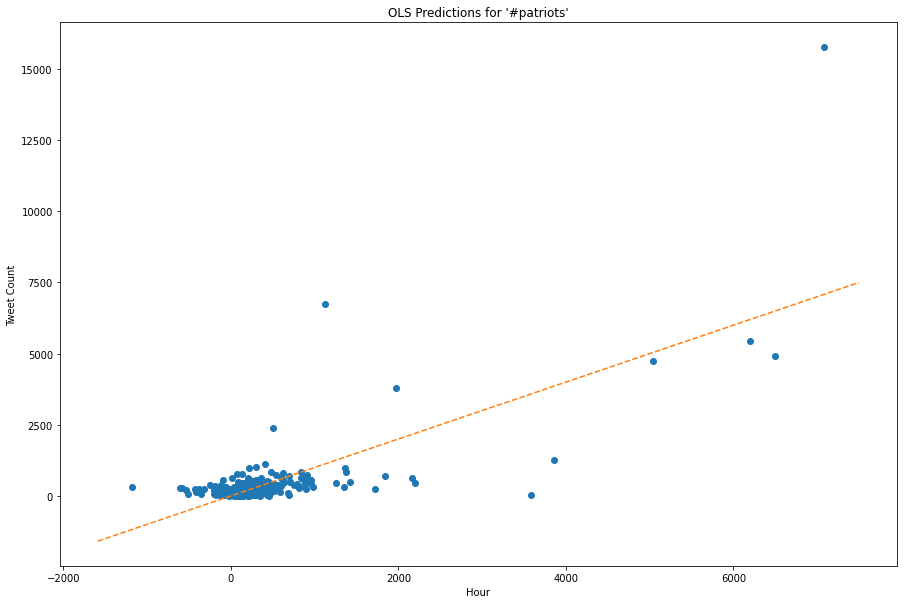

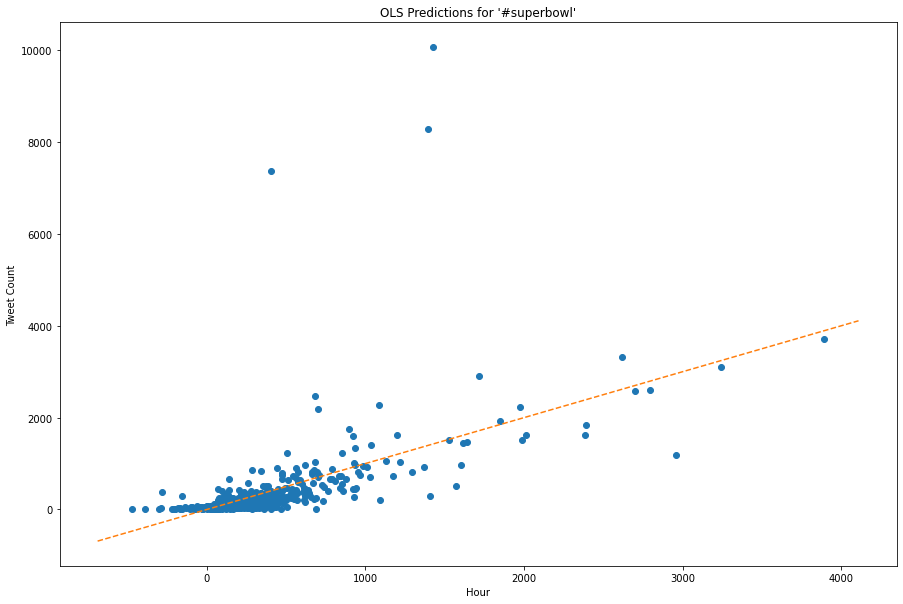

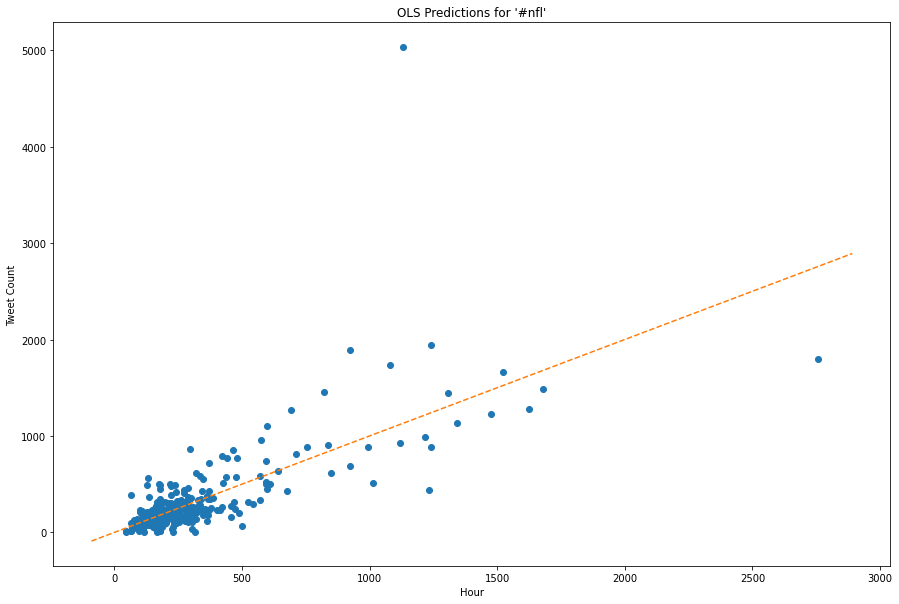

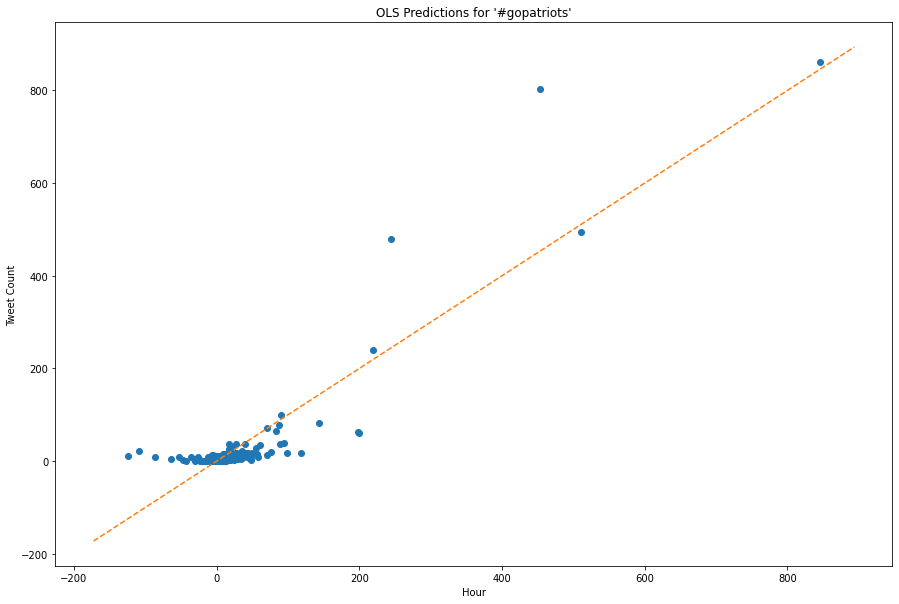

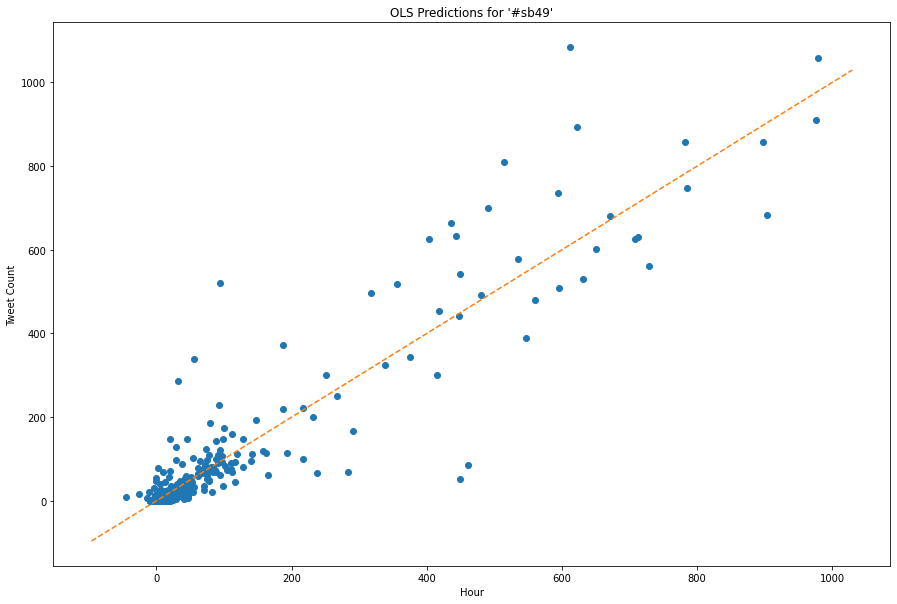

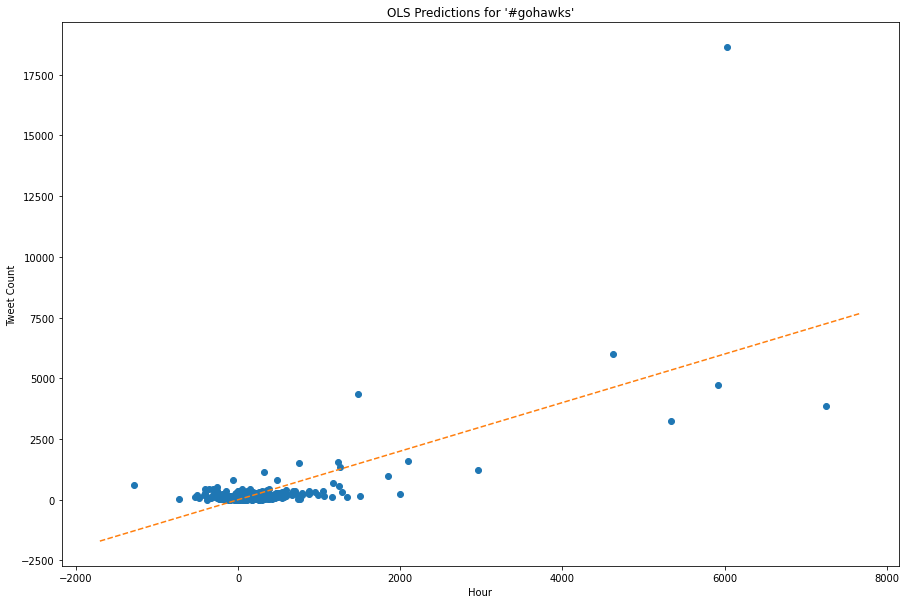

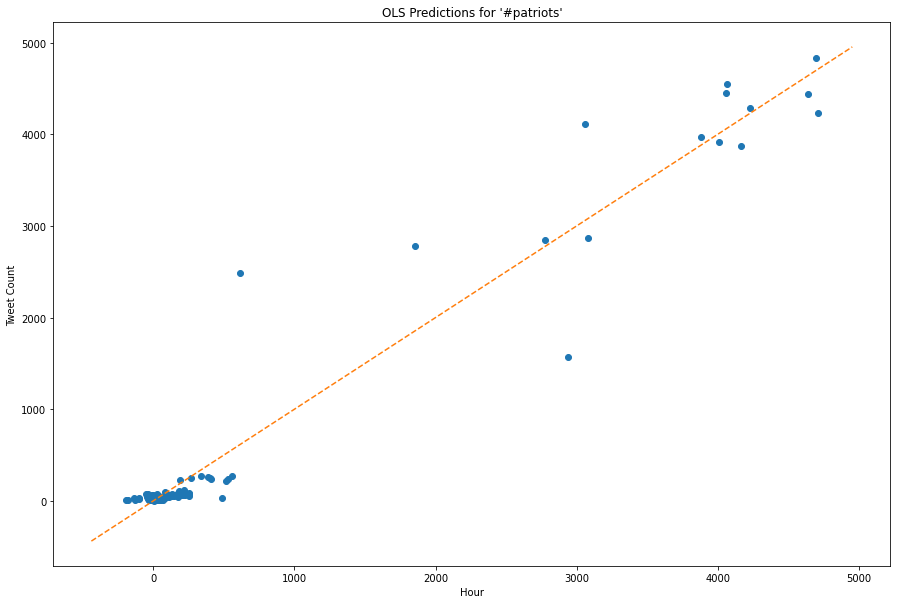

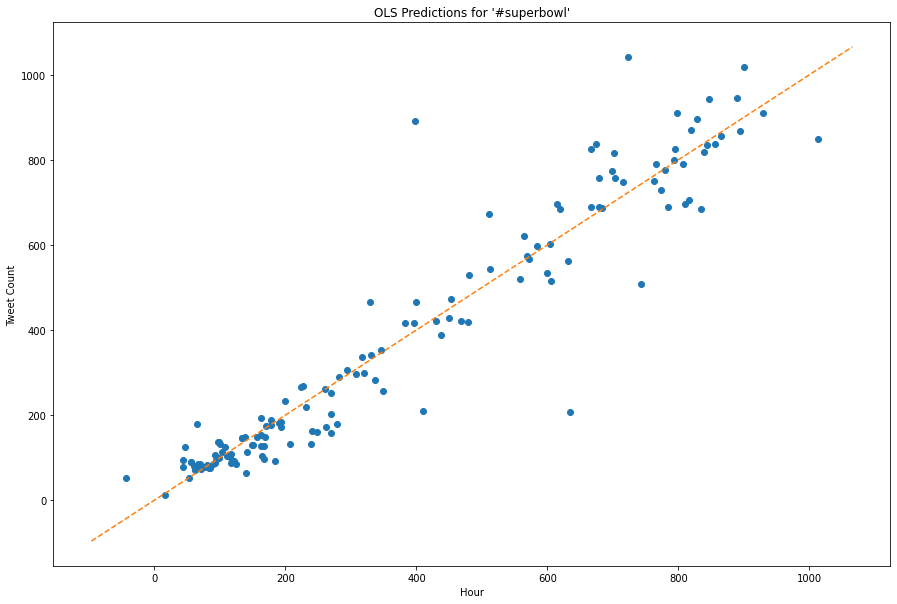

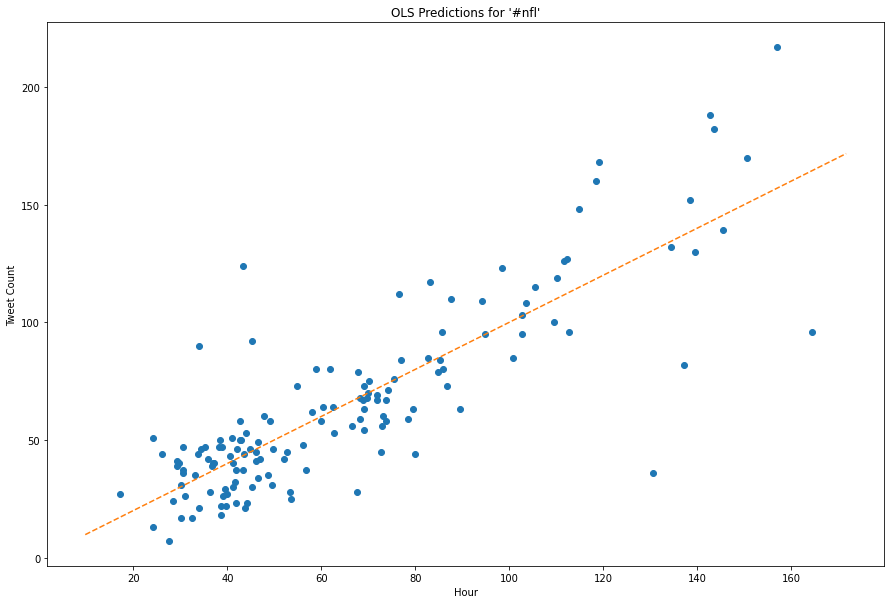

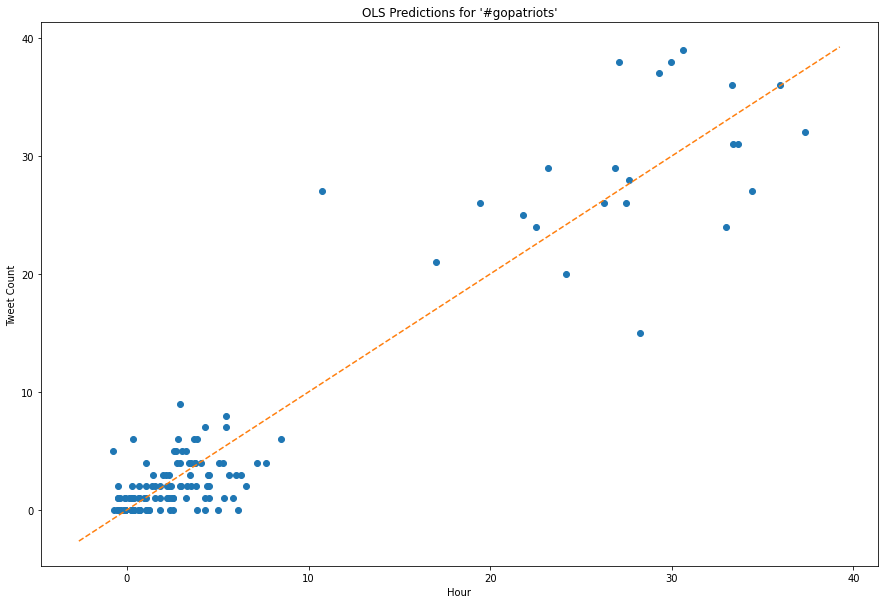

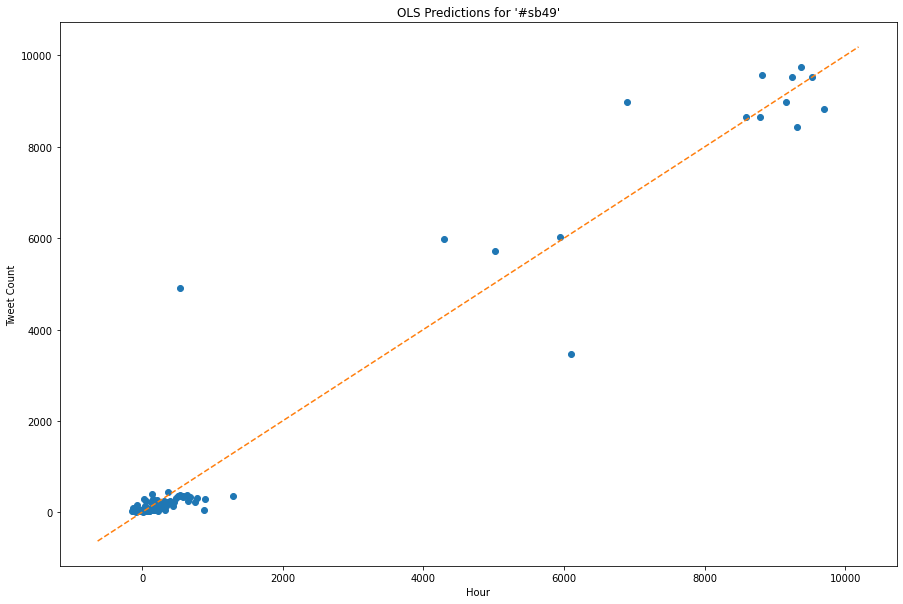

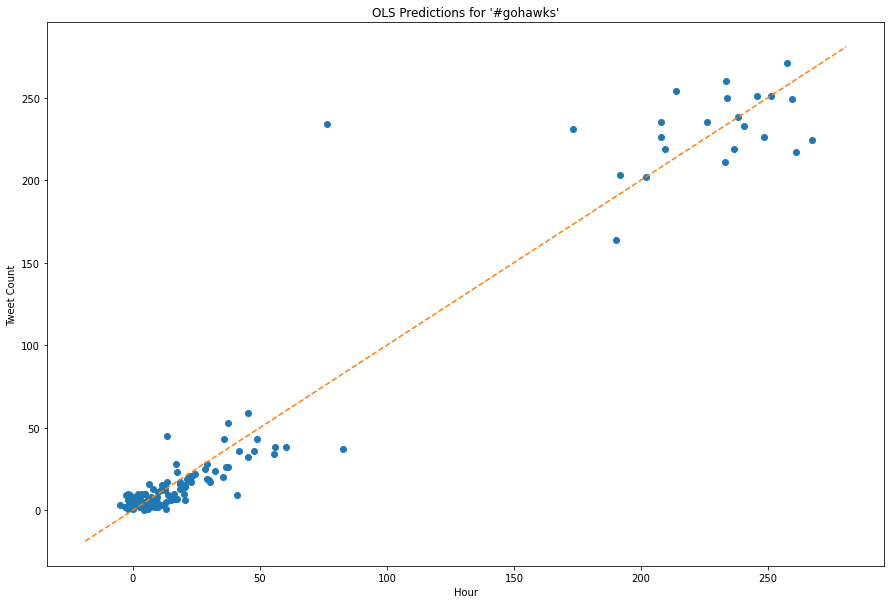

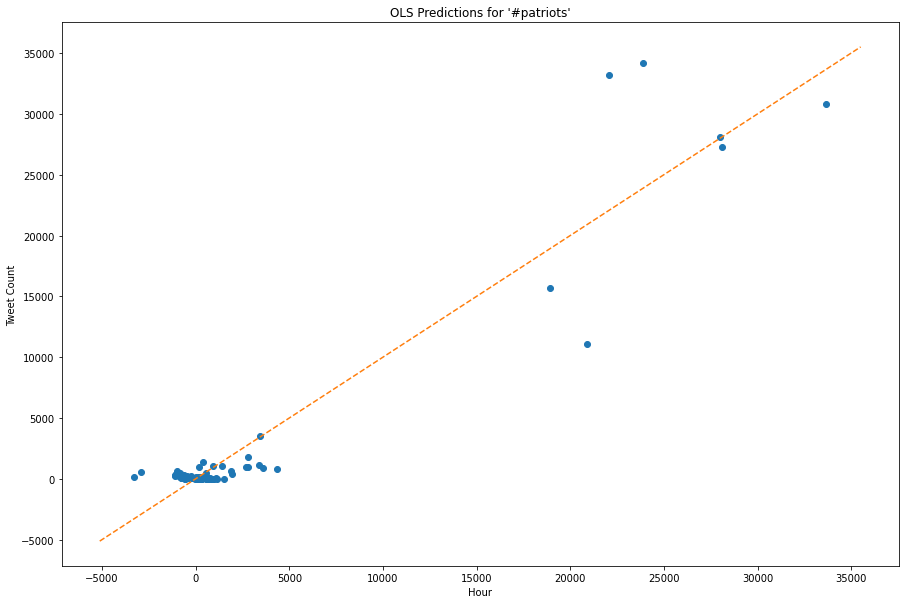

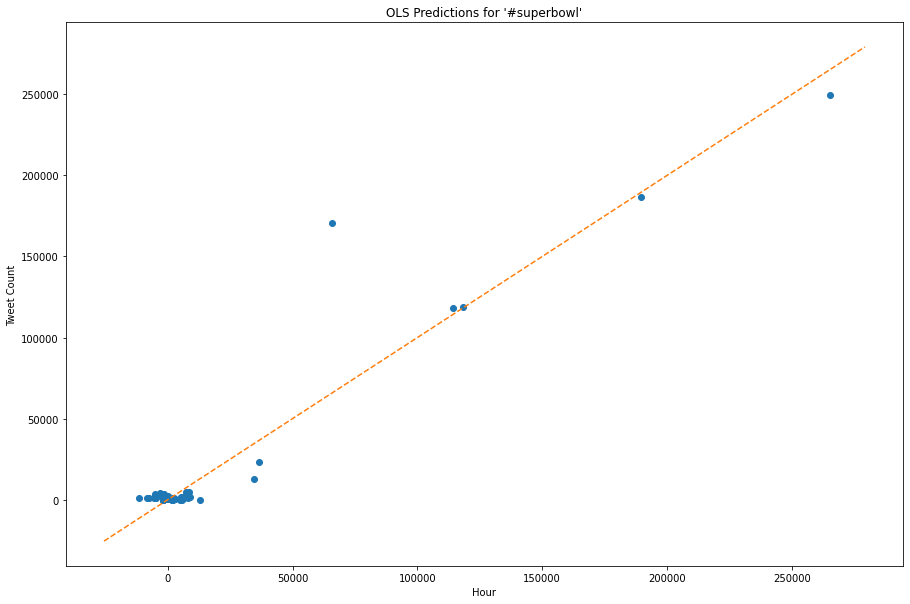

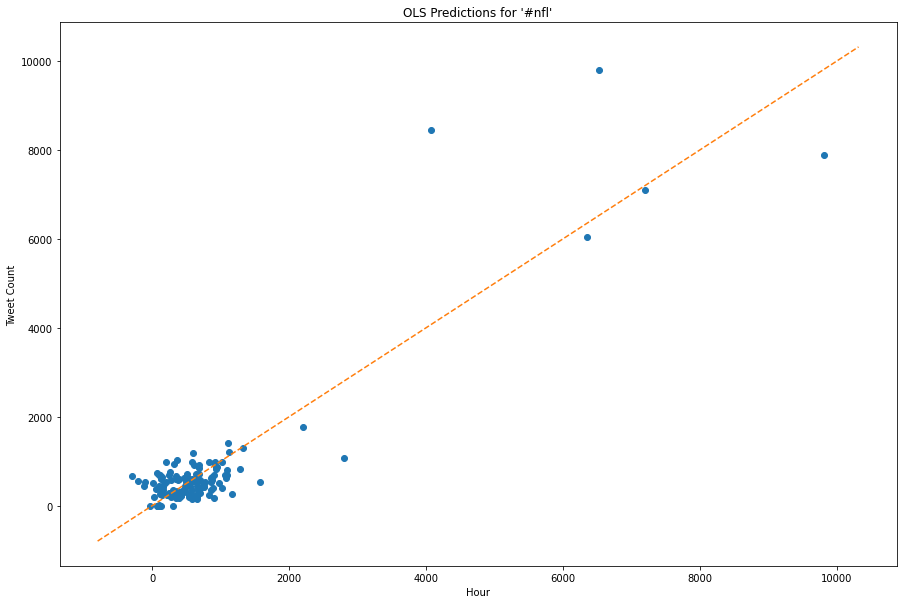

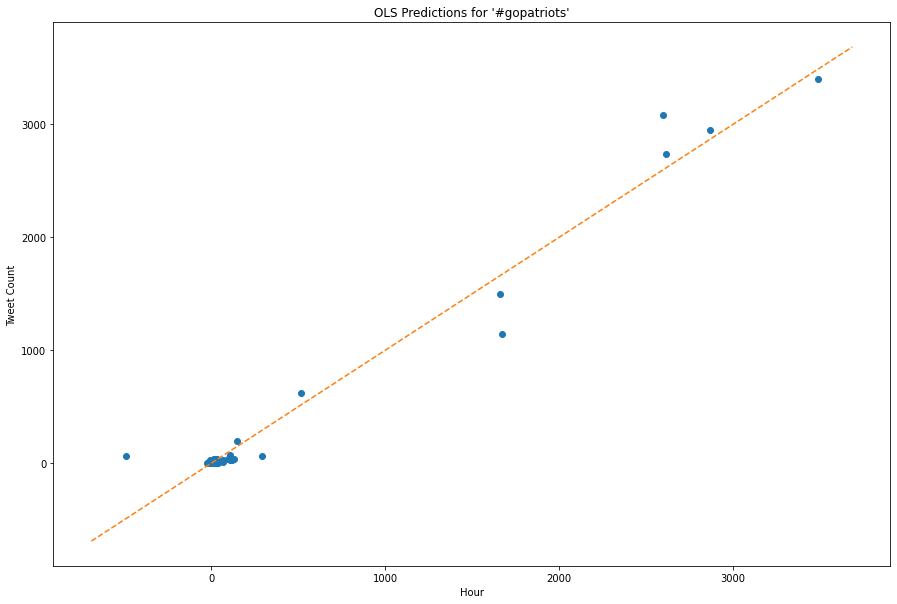

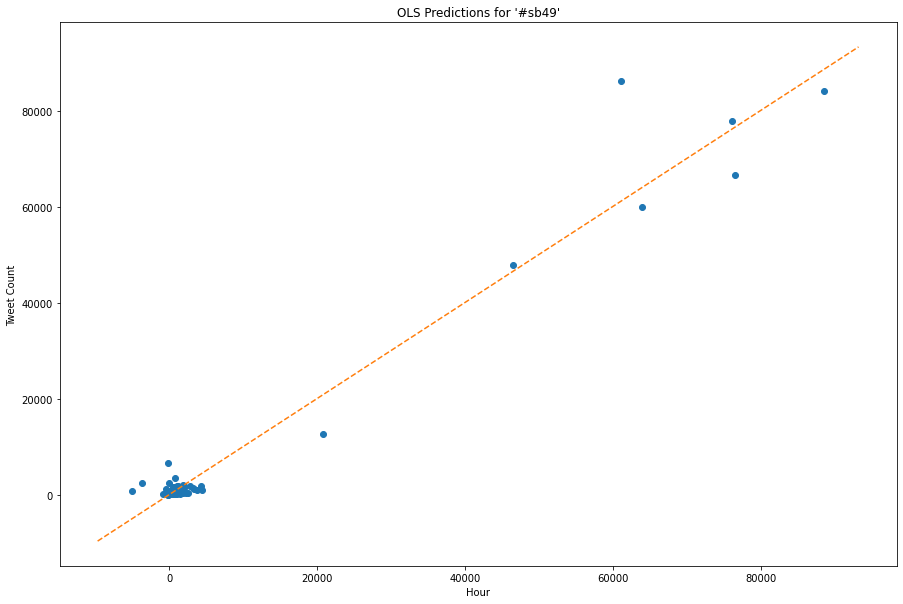

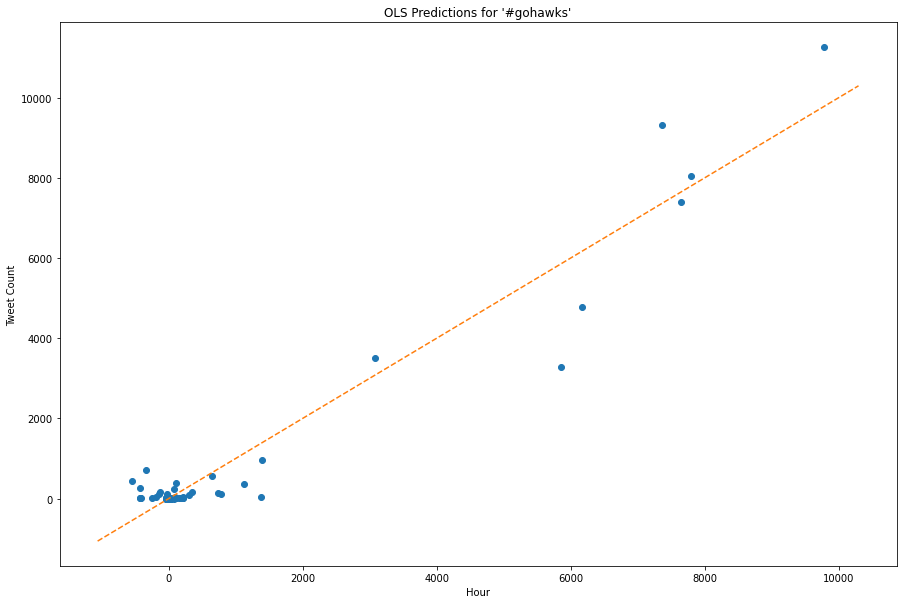

In [ ]:
regressionAnalysisForPeriods(combined_stats, report_summary=True)

## Question 7

Aggregate the data of all hashtags, and train 3 models (for the intervals mentioned above) to predict the number of tweets in the next time window on the aggregated data.

Perform the same evaluations on your combined model and compare with models you trained for individual hashtags.



data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets



data key/value pairs: 100%|██████████| 1/1 [01:43<00:00, 103.09s/it]

[112, 88, 110, 100, 137, 171, 213, 353, 569, 534, 529, 545, 525, 627, 612, 676, 258, 256, 235, 340, 403, 333, 258, 119, 88, 275, 155, 173, 336, 160, 292, 479, 632, 563, 303, 528, 652, 535, 624, 614, 376, 398, 497, 386, 243, 258, 203, 65, 145, 34, 20, 42, 180, 115, 186, 688, 885, 952, 705, 982, 1031, 825, 887, 796, 473, 801, 723, 472, 459, 338, 333, 236, 126, 102, 82, 133, 218, 93, 193, 308, 500, 613, 429, 711, 783, 687, 689, 667, 427, 714, 697, 613, 618, 542, 582, 421, 430, 348, 138, 21, 316, 542, 1143, 1844, 2455, 3087, 2495, 6387, 10257, 6694, 7268, 39442, 14567, 8748, 22600, 18547, 4384, 2642, 1996, 1414, 911, 709, 723, 666, 1512, 1121, 1474, 2183, 1964, 1975, 1159, 1716, 1547, 1414, 1082, 1219, 1291, 1270, 7972, 1351, 654, 663, 438, 409, 287, 205, 218, 227, 331, 281, 434, 692, 838, 957, 511, 775, 46, 85, 706, 785, 527, 814, 811, 671, 3311, 2253, 995, 608, 329, 261, 347, 665, 975, 737, 840, 926, 870, 858, 846, 842, 842, 766, 783, 1088, 1101, 1263, 930, 966, 815, 792, 416, 409, 214, 



data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets



data key/value pairs: 100%|██████████| 1/1 [01:39<00:00, 99.62s/it]

[300, 220, 176, 110, 32, 103, 208, 132, 176, 215, 173, 168, 226, 187, 154, 185, 168, 134, 162, 154, 148, 241, 261, 153, 270, 179, 154, 182, 156, 160, 221, 205, 186, 196, 180, 176, 218, 180, 218, 203, 207, 166, 254, 167, 192, 233, 230, 238, 290, 195, 244, 208, 238, 251, 297, 308, 209, 317, 358, 350, 452, 364, 440, 472, 471, 420, 525, 526, 503, 545, 571, 499, 760, 683, 698, 696, 699, 756, 740, 714, 686, 828, 890, 874, 1063, 913, 955, 941, 955, 908, 1012, 990, 1063, 989, 1100, 1156, 1305, 1336, 1231, 1299, 1230, 321, 245, 230, 232, 237, 282, 265, 472, 280, 333, 401, 1395, 1491, 1716, 1493, 1589, 1463, 1107, 1714, 1865, 1608, 1545, 1556, 1773, 1674, 1820, 1575, 1692, 8480, 9645, 9985, 5745, 9773, 14294, 15494, 15134, 15251, 13527, 13780, 13811, 15604, 14184, 14523]




data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets



data key/value pairs: 100%|██████████| 1/1 [07:19<00:00, 439.68s/it]

[143776, 115484, 118174, 313828, 317643, 357212, 198026, 180380, 16271, 6492, 9037, 5018, 3292, 2605, 2542, 3312, 4070, 4688, 5024, 5051, 4527, 6077, 5142, 7562, 7469, 6553, 6485, 5824, 5173, 4381, 4124, 3569, 2994, 2276, 1863, 1404, 1347, 1224, 1158, 1310, 1397, 1740, 2160, 2380, 2657, 3562, 2802, 2517, 2663, 2250, 1783, 1930, 1608, 1616, 1118, 525, 1269, 1181, 974, 549, 646, 450, 815, 634, 780, 883, 1136, 1409, 1694, 1886, 1488, 1619, 1074, 1306, 1209, 1299, 1167, 909, 1037, 897, 812, 781, 682, 540, 449, 352, 405, 385, 540, 683, 776, 872, 1045, 992, 1079, 1056, 1119, 1155, 983, 920, 904, 871, 865, 537, 679, 727, 524, 256, 406, 416, 441, 428, 515, 380, 915, 1091, 1212, 1149, 1244, 1421, 1558, 1160, 1253, 942, 935, 1221, 983, 852, 856, 882, 503, 411, 30, 28, 26, 13, 17, 36, 36, 85, 59, 49, 52]




  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
100%|██████████| 1/1 [00:00<00:00, 22.68it/s]

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
100%|██████████| 1/1 [00:00<00:00, 25.50it/s]

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
100%|██████████| 1/1 [00:00<00:00, 24.69it/s]


Time before 2015-02-01 08:00:00


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Regression analysis on '#all' tweets...
0       295.173393
1      -128.959432
2      -101.666236
3       -46.140479
4       490.610923
          ...     
425    2467.744896
426    3928.284606
427    3148.567455
428    2962.467501
429    2780.608378
Length: 430, dtype: float64
430
                            OLS Regression Results                            
Dep. Variable:             num_tweets   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.48e-58
Time:                        11:01:32   Log-Likelihood:                -3848.1
No. Observations:                 430   AIC:                             7722.
Df Residuals:                     417   BIC:                             7775.
Df Model:         

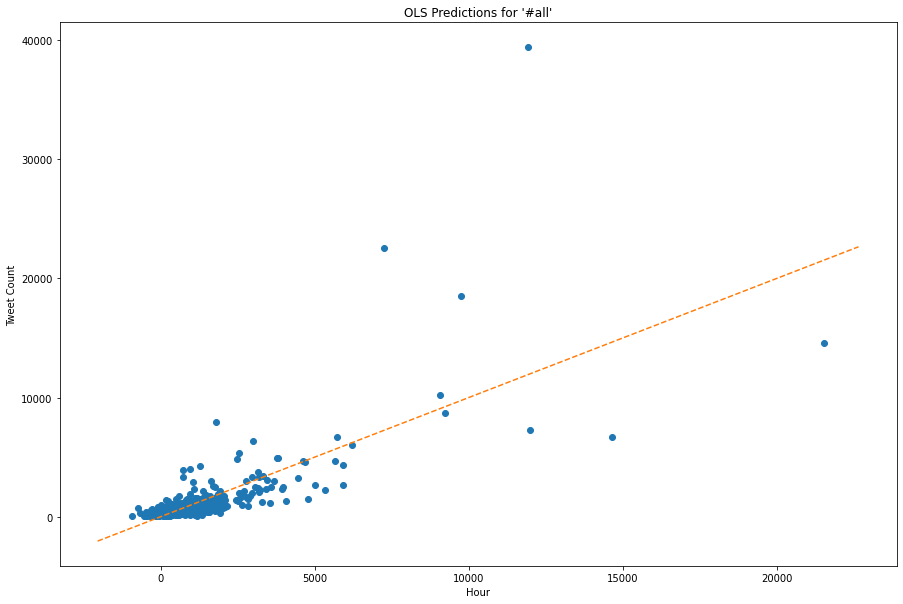

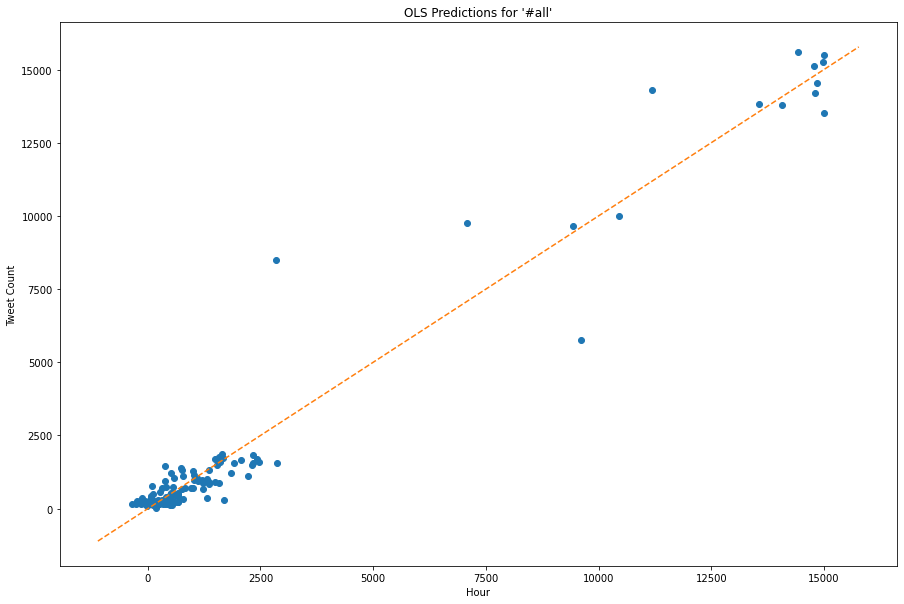

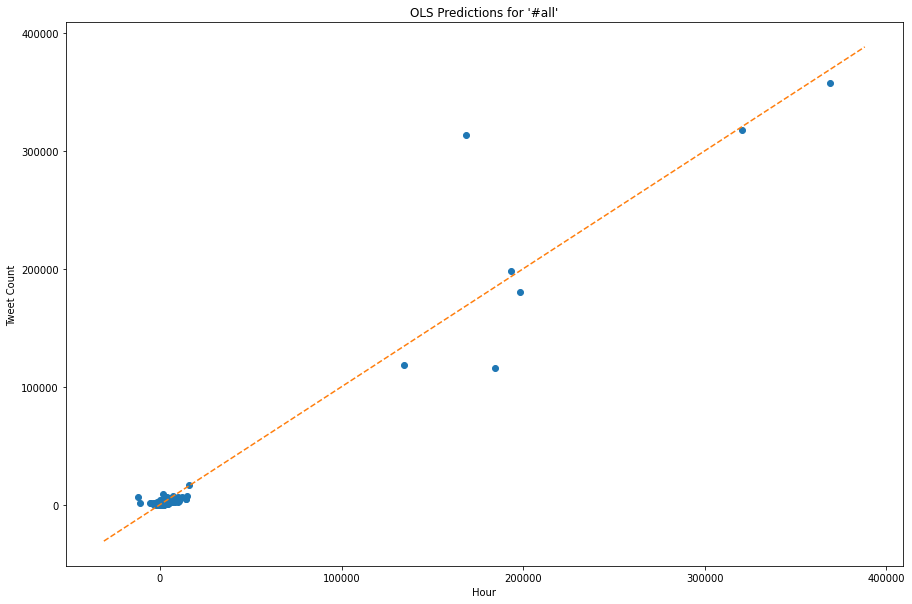

In [ ]:
all_stats = dict()
all_stats['all'] = pd.DataFrame()
for key in filename_dict:
    all_stats['all'] = pd.concat([all_stats['all'], combined_stats[key]]).reset_index(drop=True)
regressionAnalysisForPeriods(all_stats, report_summary=True)

#Nonlinear Regressions

### Question 8
Use grid search to ﬁnd the best parameter set for RandomForestRegressor and GradientBoostingRegressor respectively. Use the following param grid

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

for key, values in all_extended_windowed_stats_copy.items():
     y = values['num_tweets'][1:].reset_index().iloc[:,1]
     X = values.iloc[:-1,2:14]

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'max_depth': [10, 30, 50, 70, 100, 200, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# }

# rf = RandomForestRegressor(random_state=42)

# cv = KFold(5, shuffle=True)
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
# cv_rf.fit(X, y)
# cv_rf.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf = RandomForestRegressor(random_state=42)

cv = KFold(5, shuffle=True)
cv_rf = RandomizedSearchCV(estimator=rf, n_iter=500, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_rf.fit(X, y)
cv_rf.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 47.9min finished


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rf = RandomForestRegressor(**cv_rf.best_params_, n_jobs=-1, bootstrap=True, oob_score=True)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(rf, X, y, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
rf.fit(X, y)
y_pred = rf.predict(X)
print('Out of Bag error: ' + str(rf.oob_score_))
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 5514.933945830994
Average Test RMSE: 27210.03200257087
Out of Bag error: 0.7093344089531644
Training RMSE for 5 folds:
[6434.45286675 6210.26492197 6168.11502771  852.31285102 5773.28570641]
Test RMSE for 5 folds:
[ 7134.99896526  1986.63730871   639.15572004 60367.93969278
  1541.9491199 ]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

gb = GradientBoostingRegressor(random_state=42)

cv = KFold(5, shuffle=True)
cv_gb = RandomizedSearchCV(estimator=gb, n_iter=500, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_gb.fit(X, y)
cv_gb.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 47.9min finished


{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
gb = GradientBoostingRegressor(**cv_gb.best_params_)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(gb, X, y, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
gb.fit(X, y)
y_pred = gb.predict(X)
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 0.0003151223724791015
Average Test RMSE: 27631.680515752694
Training RMSE for 5 folds:
[0.00031601 0.00031553 0.00031511 0.00031484 0.00031412]
Test RMSE for 5 folds:
[ 3594.82938006  3422.89157611   833.85500051 61578.83961979
   510.93299698]


### Question 9
Compare the best estimator you found in the grid search with OLS on the entire dataset.


### Question 10
For each time period described in Question 6, perform the same grid search above for GradientBoostingRegressor (with corresponding time window length). Does the crossvalidation test error change? Are the best parameter set you ﬁnd in each period agree with those you found above?


In [ ]:
start_date="2015-02-01 08:00:00"
end_date="2015-02-01 20:00:00"
start_time = time.mktime(time.strptime(start_date,'%Y-%m-%d %H:%M:%S'))
end_time = time.mktime(time.strptime(end_date,'%Y-%m-%d %H:%M:%S'))
all_stats_copy = all_stats.copy()
data_before = extendedWindowedFeatures(all_stats_copy, end_time=end_time, begin=True, end=False)
data_between = extendedWindowedFeatures(all_stats_copy, window_length=300, start_time=start_time, end_time=end_time, begin=False, end=False)
data_after = extendedWindowedFeatures(all_stats_copy, start_time=start_time, begin=False, end=True)

data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets


data key/value pairs: 100%|██████████| 1/1 [02:28<00:00, 148.46s/it]

[111, 89, 110, 100, 137, 169, 215, 353, 569, 533, 529, 545, 525, 628, 611, 675, 260, 255, 234, 342, 402, 334, 258, 119, 88, 275, 155, 173, 336, 160, 291, 479, 632, 563, 304, 528, 651, 534, 626, 614, 376, 398, 496, 387, 243, 258, 203, 65, 145, 34, 20, 42, 180, 115, 185, 686, 885, 955, 704, 980, 1030, 828, 884, 799, 474, 799, 724, 472, 460, 337, 334, 236, 125, 103, 82, 133, 218, 93, 192, 309, 500, 612, 430, 710, 783, 687, 686, 670, 428, 712, 697, 614, 619, 542, 582, 416, 435, 347, 139, 21, 312, 544, 1141, 1839, 2458, 3088, 2491, 6376, 10265, 6702, 7272, 39418, 14575, 8754, 22583, 18568, 4389, 2639, 1998, 1413, 914, 707, 722, 666, 1511, 1123, 1473, 2184, 1962, 1978, 1158, 1716, 1548, 1413, 1078, 1223, 1293, 1268, 7957, 1368, 654, 658, 443, 409, 287, 204, 219, 221, 336, 282, 434, 690, 840, 957, 511, 775, 46, 85, 705, 786, 524, 817, 809, 672, 3308, 2256, 995, 609, 329, 261, 343, 667, 975, 739, 838, 927, 871, 858, 844, 843, 842, 767, 783, 1087, 1101, 1263, 928, 969, 814, 793, 414, 411, 212, 


data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets


data key/value pairs: 100%|██████████| 1/1 [01:36<00:00, 96.64s/it]

[300, 220, 176, 110, 32, 103, 208, 132, 176, 215, 173, 168, 226, 187, 154, 185, 168, 134, 162, 154, 148, 241, 261, 153, 270, 179, 154, 182, 156, 160, 221, 205, 186, 196, 180, 176, 218, 180, 218, 203, 207, 166, 254, 167, 192, 233, 230, 238, 290, 195, 244, 208, 238, 251, 297, 308, 209, 317, 358, 350, 452, 364, 440, 472, 471, 420, 525, 526, 503, 545, 571, 499, 760, 683, 698, 696, 699, 756, 740, 714, 686, 828, 890, 874, 1063, 913, 955, 941, 955, 908, 1012, 990, 1063, 989, 1100, 1156, 1305, 1336, 1231, 1299, 1230, 321, 245, 230, 232, 237, 282, 265, 472, 280, 333, 401, 1395, 1491, 1716, 1493, 1589, 1463, 1107, 1714, 1865, 1608, 1545, 1556, 1773, 1674, 1820, 1575, 1692, 8480, 9645, 9985, 5745, 9773, 14294, 15494, 15134, 15251, 13527, 13780, 13811, 15604, 14184, 14523]



data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets


data key/value pairs: 100%|██████████| 1/1 [07:29<00:00, 449.24s/it]

[2013, 2173, 2265, 2506, 3265, 5788, 9024, 12045, 8213, 13454, 43218, 161120, 143776, 115484, 118174, 313828, 317643, 357212, 198026, 180380, 16271, 6492, 9037, 5018, 3292, 2605, 2542, 3312, 4070, 4688, 5024, 5051, 4527, 6077, 5142, 7562, 7469, 6553, 6485, 5824, 5173, 4381, 4124, 3569, 2994, 2276, 1863, 1404, 1347, 1224, 1158, 1310, 1397, 1740, 2160, 2380, 2657, 3562, 2802, 2517, 2663, 2250, 1783, 1930, 1608, 1616, 1118, 525, 1269, 1181, 974, 549, 646, 450, 815, 634, 780, 883, 1136, 1409, 1694, 1886, 1488, 1619, 1074, 1306, 1209, 1299, 1167, 909, 1037, 897, 812, 781, 682, 540, 449, 352, 405, 385, 540, 683, 776, 872, 1045, 992, 1079, 1056, 1119, 1155, 983, 920, 904, 871, 865, 537, 679, 727, 524, 256, 406, 416, 441, 428, 515, 380, 915, 1091, 1212, 1149, 1244, 1421, 1558, 1160, 1253, 942, 935, 1221, 983, 852, 856, 882, 503, 411, 30, 28, 26, 13, 17, 36, 36, 85, 59, 49, 52]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

for key, values in data_before.items():
     y_before = values['num_tweets'][1:].reset_index().iloc[:,1]
     X_before = values.iloc[:-1,2:14]

for key, values in data_between.items():
     y_between= values['num_tweets'][1:].reset_index().iloc[:,1]
     X_between = values.iloc[:-1,2:14]

for key, values in data_after.items():
     y_after = values['num_tweets'][1:].reset_index().iloc[:,1]
     X_after = values.iloc[:-1,2:14]     

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

gb = GradientBoostingRegressor(random_state=42)

cv = KFold(5, shuffle=True)
cv_gb = RandomizedSearchCV(estimator=gb, n_iter=1000, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_gb.fit(X_before, y_before)
cv_gb.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 64.2min finished


{'max_depth': 200,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
gb = GradientBoostingRegressor(**cv_gb.best_params_)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(gb, X_before, y_before, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
gb.fit(X_before, y_before)
y_pred = gb.predict(X_before)
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 0.0003146537474473755
Average Test RMSE: 10422.910212351324
Training RMSE for 5 folds:
[0.00031517 0.00031556 0.00031449 0.00031554 0.00031251]
Test RMSE for 5 folds:
[  366.64111204 15733.8074463    578.98207621   919.97182442
 17155.65783085]


In [ ]:
param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

gb = GradientBoostingRegressor(random_state=42)

cv = KFold(5, shuffle=True)
cv_gb = RandomizedSearchCV(estimator=gb, n_iter=1000, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_gb.fit(X_between, y_between)
cv_gb.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 15.5min finished


{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
gb = GradientBoostingRegressor(**cv_gb.best_params_)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(gb, X_between, y_between, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
gb.fit(X_between, y_between)
y_pred = gb.predict(X_between)
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 0.0003143454675255396
Average Test RMSE: 3766.93608289122
Training RMSE for 5 folds:
[0.00031593 0.00031409 0.00031383 0.00031512 0.00031275]
Test RMSE for 5 folds:
[ 156.72070234   59.36458139  178.83880908  344.60928508 8412.50336415]


In [ ]:
param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

gb = GradientBoostingRegressor(random_state=42)

cv = KFold(5, shuffle=True)
cv_gb = RandomizedSearchCV(estimator=gb, n_iter=1000, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_gb.fit(X_after, y_after)
cv_gb.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1017 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1989 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2596 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 3285 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4054 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 4905 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 20.4min finished


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [ ]:
gb = GradientBoostingRegressor(**cv_gb.best_params_)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(gb, X_after, y_after, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
gb.fit(X_after, y_after)
y_pred = gb.predict(X_after)
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 0.00031418560458316725
Average Test RMSE: 53761.34690398858
Training RMSE for 5 folds:
[0.0003128  0.00031592 0.00031265 0.00031509 0.00031445]
Test RMSE for 5 folds:
[120180.50971023   2769.03214769    271.9940225     245.12402345
    505.55402681]


# Neural Network

In [ ]:
# Build and train the neural network using sklearn API
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# def applying standard scaler is eqivalent to dividing each feature value by the standard deviation of the feature
def StdScaler(X):
    print(X.shape)
    X = X / np.std(X)
    return X

def kFoldAuto(model, data, targets, kf):
    RMSE_train = []
    MSE_train = []
    RMSE_test = []
    MSE_test = []
    for train_idx, test_idx in kf.split(pd.Series(targets.index)):
        print("KF train and test split begining...")
        train_data_features = data.iloc[train_idx, :]
        test_data_features = data.iloc[test_idx, :]
        train_data_target = targets[train_idx]
        test_data_target = targets[test_idx]
        model = model.fit(train_data_features, train_data_target)
        train_pred = model.predict(train_data_features)
        test_pred = model.predict(test_data_features)
        MSE_train.append(mean_squared_error(train_data_target, train_pred))
        MSE_test.append(mean_squared_error(test_data_target, test_pred))
        RMSE_train.append(math.sqrt(mean_squared_error(train_data_target, train_pred)))
        RMSE_test.append(math.sqrt(mean_squared_error(test_data_target, test_pred)))
    print("RMSE_train",RMSE_train)
    print("RMSE_test",RMSE_test)
    print("MSE_train",MSE_train)
    print("MSE_test",MSE_test)
    avgRMSE_train = np.average(RMSE_train)
    avgRMSE_test = np.average(RMSE_test)
    avgMSE_train = np.average(MSE_train)
    avgMSE_test = np.average(MSE_test)
    return (avgMSE_train, avgMSE_test)

def evaluateNeuralNetwork(data, n_cols=14, grid_search=True, **kwargs):
    print("\n","~"*30,"\n", "Multi Layer Perceptron regression analysis on aggregate tweets...")
    
    start_col = kwargs['df_start_col'] if 'df_start_col' in kwargs else 2
    end_col = kwargs['df_end_col'] if 'df_end_col' in kwargs else 14
    report_summary = kwargs['report_summary'] if 'report_summary' in kwargs else False
    std_scale = kwargs['std_scale'] if 'std_scale' in kwargs else False
    network_model = kwargs['network_model'] if 'network_model' in kwargs else None
    param_grid = kwargs['param_grid'] if 'param_grid' in kwargs else None

    if network_model == None and param_grid == None:
        print('No network model and param grid passed, figure it out.')
        return

    if grid_search==True:
        network_model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                        warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                        n_iter_no_change=10, max_fun=15000)
        if param_grid == None:
            print("Expecting param_grid with grid search")
            return
    else:
        if network_model == None:
            print("Expecting network_model without grid search")
            return

    kf = KFold(n_splits=10, shuffle = True, random_state=42)

    if std_scale:
        scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        for key, values in data.items():
            y = values['num_tweets'][1:].reset_index().iloc[:,1]
            columns = values.columns
            columns_pass = values.columns[0:start_col-1]
            columns_pass = list(range(0,start_col-1))
            columns_trans = values.columns[start_col:end_col]
            columns_trans = list(range(start_col-1,end_col))
            features = values
            ct=ColumnTransformer([('ct_1',StandardScaler(copy=True, with_mean=True, with_std=True),columns_trans),('ct_2','passthrough',columns_pass)])
            data[key] = pd.DataFrame(ct.fit_transform(features), columns=columns)

    for key, values in data.items():
        if not std_scale:
            y = values['num_tweets'][1:].reset_index().iloc[:,1]
        X = values.iloc[:-1,start_col:end_col]
        idx = pd.Series(y.index)


    if grid_search:
        print("Beginning grid search for best multi-layer perception parameters...\n")
        network_model = GridSearchCV(estimator=network_model, param_grid=param_grid,
                                      n_jobs=-1, scoring='neg_root_mean_squared_error', cv = 10, verbose=2)
        network_model.fit(X, y)
        print("Best MLP Paramters Determined from Grid Search(Estimator):" )
        print(network_model.best_estimator_)
        print("Best MLP Paramters Determined from Grid Search:(parameters)" )
        print(network_model.best_params_)
        

    avgMSE_train, avgMSE_test = kFoldAuto(network_model, X, y, kf)
    print("Average MSE from training: ", avgMSE_train)
    print("Average MSE from testing: ", avgMSE_test)

##Question 11
Now try to regress the aggregated data with MLPRegressor. Try diﬀerent architectures (i.e. the structure of the network) by adjusting hidden layer sizes. You should try at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you tried, as well as its MSE of ﬁtting the entire aggregated data.

In [ ]:
# run this first:
all_extended_windowed_stats = extendedWindowedFeatures(all_stats)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets


In [ ]:
######################################################### (1/7) #########################################################
hidden_layer_sizes = (5,5,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...
KF train and test split begining...
KF train and test split begining...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KF train and test split begining...
RMSE_train [160317.77591070338, 967116.8039132948, 146209.17166146502, 56250.4323736117, 2559918.1888398146, 23938.41970753217, 71357.78246606674, 18022.05184158738, 61501.211293226115, 1460107.3691244102]
RMSE_test [172343.2927537478, 834989.0584204317, 121159.09237986174, 43902.18199380657, 523936.90982529434, 51341.22865830819, 115372.84353048074, 4430.387566606026, 49075.313026498865, 306457.247653313]
MSE_train [25701789272.954506, 935314912411.4663, 21377121877.931747, 3164111142.218263, 6553181133552.917, 573047938.0939647, 5091933118.474503, 324794352.5808632, 3782398990.534044, 2131913529371.407]
MSE_test [29702210557.20402, 697206727681.839, 14679525666.311872, 1927401583.8173137, 274509885477.2786, 2635921760.1446857, 13310893024.30879, 19628333.990337264, 2408386348.648849, 93916044639.24399]
Average MSE from training:  968042477202.8578
Average MSE from testing:  113031662507.27873


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
######################################################### (2/7) #########################################################
hidden_layer_sizes = (50,50,50,50,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

In [ ]:
######################################################### (3/7) #########################################################
hidden_layer_sizes = (100,100,100,100,100,100,100,100,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

In [ ]:
######################################################### (4/7) #########################################################
hidden_layer_sizes = (500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

In [ ]:
######################################################### (5/7) #########################################################
hidden_layer_sizes = (50,100,500,1000,500,100,50,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

In [ ]:
######################################################### (6/7) #########################################################
hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100,
                      100,100,100,100,100,100,100,100,100,100,
                      100,100,100,100,100,100,100,100,100,100,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

In [ ]:
######################################################### (7/7) #########################################################
hidden_layer_sizes = (1000,1000,1000,)
network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()
print(all_extended_windowed_stats_copy)


evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14)

{'all':      window_start  num_tweets  ...  happy_count  sad_count
0      1421222404         112  ...            0          0
1      1421226004          88  ...            1          0
2      1421229604         110  ...            0          0
3      1421233204         100  ...            0          0
4      1421236804         137  ...            0          0
..            ...         ...  ...          ...        ...
582    1423317604          36  ...            0          0
583    1423321204          85  ...            0          0
584    1423324804          59  ...            0          0
585    1423328404          49  ...            0          0
586    1423332004          52  ...            0          0

[587 rows x 14 columns]}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and 

## Question 12
apply standard scaler and compare the results

In [ ]:
# apply standard scaler to coulmns before passing to MLP regressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

hidden_layer_sizes = (500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,)

network_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                n_iter_no_change=10, max_fun=15000)

all_extended_windowed_stats_copy = all_extended_windowed_stats.copy()

evaluateNeuralNetwork(all_extended_windowed_stats_copy, grid_search=False,
                      network_model=network_model, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
KF train and test split begining...
RMSE_train [29737.391521761085, 27153.466129568533, 29795.84910266057, 28084.451013749076, 29378.49102840274, 30692.24974864504, 25145.528943658348, 29807.54829254478, 29905.873233878687, 29704.283115122536]
RMSE_test [5294.125960980408, 41269.05896168451, 2429.4435754470096, 29412.545523244993, 15417.34234595526, 27815.620781609043, 48358.20834395433, 8509.764007080987, 48113.72630789437, 4766.829363565924]
Average RMSE from training:  28940.513212999143
Average RMSE from testing:  23138.666517141683


## Question 13
Using grid search, ﬁnd the best architecture (for scaled data) for each period (with corresponding window length) described in Question 6.

  - Multi-layer Perceptron Grid Search

In [ ]:
# all_stats - 'combined_stats' (basic and extra) aggregated into a single dataFrame, not yet windowed
start_date="2015-02-01 08:00:00"
end_date="2015-02-01 20:00:00"
start_time = time.mktime(time.strptime(start_date,'%Y-%m-%d %H:%M:%S'))
end_time = time.mktime(time.strptime(end_date,'%Y-%m-%d %H:%M:%S'))
all_stats_copy = all_stats.copy()
data_before = extendedWindowedFeatures(all_stats_copy, end_time=start_time, begin=True, end=False)
data_between = extendedWindowedFeatures(all_stats_copy, window_length=300, start_time=start_time, end_time=end_time, begin=False, end=False)
data_after = extendedWindowedFeatures(all_stats_copy, start_time=end_time, begin=False, end=True)


data key/value pairs:   0%|          | 0/1 [00:00<?, ?it/s]


Currently processing '#all' tweets


### Before: "2015-02-01 08:00:00"

In [ ]:
# Grid search
# Before "2015-02-01 08:00:00"
# Hidden Layer Sizes

param_grid = [
        {
            'hidden_layer_sizes': [
                                    (100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),
                                    (100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,)
                                    ],
            'activation': ['relu'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]

data_before_copy = data_before.copy()

evaluateNeuralNetwork(data_before_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.4min finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.8min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.7min finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.4min finished


RMSE_train [902.8739164112167, 565.4753005001402, 641.0806394213165, 2441.530820921944, 570.1969247664405, 3040.373245759146, 2092.7370271381487, 2356.8091464366803, 1219.3511889260346, 1073.3715266566523]
RMSE_test [898.2533930188455, 3055.363917715841, 4816.107451106643, 3745.6049110559225, 610.4094458246717, 2021.8466612820837, 1133.5744943735442, 1435.8877196590959, 849.5442926721985, 1289.6452218746635]
Average RMSE from training:  1490.3799736937722
Average RMSE from testing:  1985.6237508583513


In [ ]:
# Grid search
# Before "2015-02-01 08:00:00"
# Activation

param_grid = [
        {
            'hidden_layer_sizes': [(500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]


evaluateNeuralNetwork(data_before_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 500, 500, 500, 500, 500, 500, 500, 500,
                                 500, 500, 500, 500, 500, 500, 500),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500), 'learning_rate_init': 0.001}
KF train and test split begining...
Fitting 10 folds for each of 3 candidat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.0min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.3min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.4min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.9min finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.4min finished


RMSE_train [1.0467415096892723, 1.0378607372764888, 0.8141453127302608, 0.434021600250827, 0.6426021050555796, 0.8502341123038458, 0.6758390946374866, 0.679999475855981, 1.0080650141813867, 0.600601406319118]
RMSE_test [0.3755971429850874, 0.5546131522634848, 0.9158215519537207, 0.2852234505089858, 1.4427086115472894, 0.23766256267215563, 0.6105138529230899, 0.09811980508149355, 0.9359904297088397, 2.614356830252456]
Average RMSE from training:  0.7790110368300247
Average RMSE from testing:  0.8070607389896602


In [ ]:
# Grid search
# Before "2015-02-01 08:00:00"
# BEST PARMS

param_grid = [
        {
            'hidden_layer_sizes': [(500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),],
            'activation': ['logistic'],
            'alpha': [0.001,],
            'learning_rate_init': [0.005]
        }
    ]


evaluateNeuralNetwork(data_before_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 500, 500, 500, 500, 500, 500, 500, 500,
                                 500, 500, 500, 500, 500, 500, 500),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 1 candidates

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


RMSE_train [0.9962066452187348, 0.9990287177367221, 1.0117716570651378, 0.9983387674433968, 1.0001130005265135, 0.9987735747606408, 0.9954849041066173, 0.998706361572573, 1.0070305058005553, 0.9928452163903465]
RMSE_test [1.026786738445443, 0.9935501594970355, 0.8679657989380056, 1.028133301149288, 0.9822500856499728, 1.0024260827160456, 1.0215774291162185, 0.9963109364850739, 1.0392373168198918, 1.0469040919425594]
Average RMSE from training:  0.9998299350621238
Average RMSE from testing:  1.0005141940759534


### Between: "2015-02-01 08:00:00" and "2015-02-01 20:00:00"

In [ ]:
# Grid search
# Between "2015-02-01 08:00:00" and "2015-02-01 20:00:00"
# Hidden Layer Sizes

param_grid = [
        {
            'hidden_layer_sizes': [
                                    (100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),
                                    (100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,)
                                    ],
            'activation': ['relu'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]

data_between_copy = data_between.copy()

evaluateNeuralNetwork(data_between_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   54.7s finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100, 100, 100, 100, 100, 100, 100),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   59.1s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   50.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   45.8s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   48.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.8s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   51.9s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   46.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   27.7s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   50.4s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   57.0s finished


RMSE_train [172.27999888705529, 186.31181763900165, 119.78584459626195, 83.89051356001079, 33.52816503415951, 1905.4598608773492, 220.51096496726078, 4014.38319938506, 103.79806117607534, 49.17548467324222]
RMSE_test [1328.1488178774332, 291.1017039007743, 348.77024217069567, 298.36655612613833, 1184.3993694607248, 1621.536282233854, 336.154092810395, 5779.181279883217, 1942.9508936903364, 799.2245136422458]
Average RMSE from training:  688.9123910795477
Average RMSE from testing:  1392.9833751795818


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Grid search
# Between "2015-02-01 08:00:00" and "2015-02-01 20:00:00"
# Activation

param_grid = [
        {
            'hidden_layer_sizes': [(500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]

data_between_copy = data_between.copy()

evaluateNeuralNetwork(data_between_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 500, 500, 500, 500, 500, 500, 500, 500,
                                 500, 500, 500, 500, 500, 500, 500),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500), 'learning_rate_init': 0.001}
KF train and test split begining...
Fitting 10 folds for each of 3 candidates, tota

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished


RMSE_train [4331.1446947772865, 4436.487108090046, 4437.014620821852, 4425.147331980017, 3401.100461573106, 4256.332734404866, 4423.595459565909, 3999.553402740877, 4013.5725895129085, 4237.568434468069]
RMSE_test [2933.8567567209748, 876.6299904758946, 858.7014382927081, 600.5217070917336, 8616.583149460675, 3716.539660254136, 681.730058155258, 5779.05211273102, 5687.915389598041, 3914.262734272655]
Average RMSE from training:  4196.151683793493
Average RMSE from testing:  3366.5792997053095


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Grid search
# Between "2015-02-01 08:00:00" and "2015-02-01 20:00:00"
# BEST PARMS

param_grid = [
        {
            'hidden_layer_sizes': [(500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),],
            'activation': ['tanh'],
            'alpha': [0.001,],
            'learning_rate_init': [0.005]
        }
    ]

data_between_copy = data_between.copy()

evaluateNeuralNetwork(data_between_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 500, 500, 500, 500, 500, 500, 500, 500,
                                 500, 500, 500, 500, 500, 500, 500),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


RMSE_train [4235.627029459361, 4514.089238889128, 4368.501377835323, 4422.002820467704, 3450.0147172458314, 4157.179656735182, 4391.043750796296, 4064.417946598343, 3934.2660706537317, 4287.30416279236]
RMSE_test [2833.4392344402922, 922.1624284186327, 852.4684127090914, 1054.2016473116232, 8692.09783429184, 3586.9057326054053, 851.04120067817, 5854.591773841318, 5553.596671545517, 3962.4965939015433]
Average RMSE from training:  4182.444677147327
Average RMSE from testing:  3416.3001529743437


### After: "2015-02-01 20:00:00"

In [ ]:
# Grid search
# After "2015-02-01 20:00:00"
# Hidden Layer Sizes

param_grid = [
        {
            'hidden_layer_sizes': [
                                    (100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,),
                                    (100,100,100,100,100,100,100,100,),
                                    (500,500,500,500,500,500,500,500,)
                                    ],
            'activation': ['relu'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]

data_after_copy = data_after.copy()

evaluateNeuralNetwork(data_after_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   29.2s finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 500, 500, 500, 500, 500, 500, 500),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (500, 500, 500, 500, 500, 500, 500, 500), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   42.7s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.5s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   40.5s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   47.5s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   30.2s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   40.2s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.5s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   35.9s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   43.2s finished


KF train and test split begining...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   40.0s finished


RMSE_train [57747.95729342174, 722.2797109031723, 56835.27284357337, 57744.94911978556, 10659.034766864472, 54954.72976598766, 684.1589686255695, 57752.27427047386, 56801.120153861266, 57743.2482563147]
RMSE_test [2047.3274731934923, 56362.036039247345, 30919.02167821313, 4306.587110128679, 1442.4859895395, 52950.887463995605, 78390.45186551267, 1337.4777001356158, 31637.641801598016, 2033.0757650460814]
Average RMSE from training:  41164.50251498113
Average RMSE from testing:  26142.699288661017


In [ ]:
# Grid search
# After "2015-02-01 20:00:00"
# Activation

param_grid = [
        {
            'hidden_layer_sizes': [(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100),],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.001],
            'learning_rate_init': [0.005]
        }
    ]

data_after_copy = data_after.copy()

evaluateNeuralNetwork(data_after_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.2s finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100, 100, 100, 100, 100, 100, 100),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.5s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.1s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.2s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.3s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.4s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.3s finished


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KF train and test split begining...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.4s finished


RMSE_train [577.9745159890056, 431.35031539142796, 57225.931591607565, 48051.81010013639, 45004.64401475514, 58487.43003335516, 54779.61014084161, 55789.71952935285, 58489.166044756064, 51968.021799676775]
RMSE_test [76513.55811858807, 27929.954304119496, 35877.4243491788, 97581.33159860752, 1607.5448708684528, 3405.0500916155083, 28193.044059410906, 50737.44726047802, 3137.271583959686, 80965.66130137305]
Average RMSE from training:  43080.5658085862
Average RMSE from testing:  40594.82875381995


In [ ]:
# Grid search
# After "2015-02-01 20:00:00"
# BEST PARMS

param_grid = [
        {
            'hidden_layer_sizes': [(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100),],
            'activation': ['relu'],
            'alpha': [0.001,],
            'learning_rate_init': [0.005]
        }
    ]

data_after_copy = data_after.copy()

evaluateNeuralNetwork(data_after_copy, grid_search=True, 
                      param_grid=param_grid, df_start_col=1, df_end_col=14, std_scale=True)


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Multi Layer Perceptron regression analysis on aggregate tweets...
Beginning grid search for best multi-layer perception parameters...

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.6s finished


Best MLP Paramters Determined from Grid Search(Estimator):
MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100, 100, 100, 100, 100, 100, 100),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)
Best MLP Paramters Determined from Grid Search:(parameters)
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.005}
KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


KF train and test split begining...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


RMSE_train [4122.925685707262, 230.38107566671474, 315.43714919123795, 4227.59701132928, 3427.8979360365665, 182.99887328122648, 4465.865923526504, 4033.4520530238956, 3908.3755210902336, 3949.0888104192145]
RMSE_test [2816.2015553972724, 251.4102247299141, 218.14312993376095, 627.9576274097873, 8632.596928017463, 546.2911733876994, 752.247439297872, 5808.555710188979, 5570.366699381332, 3631.1696267479924]
Average RMSE from training:  2886.4020039272136
Average RMSE from testing:  2885.4940114492074


#Using 6x window to predict


## Question 14
Report the model you use. For each test ﬁle, provide your predictions on the number of tweets in the next time window.


In [ ]:
start_date="2015-02-01 08:00:00"
end_date="2015-02-01 20:00:00"
start_time = time.mktime(time.strptime(start_date,'%Y-%m-%d %H:%M:%S'))
end_time = time.mktime(time.strptime(end_date,'%Y-%m-%d %H:%M:%S'))
data_before = extendedWindowedFeatures(all_stats, end_time=start_time, begin=True, end=False)
data_between = extendedWindowedFeatures(all_stats, window_length=300, start_time=start_time, end_time=end_time, begin=False, end=False)
data_after = extendedWindowedFeatures(all_stats, start_time=end_time, begin=False, end=True)

In [ ]:
def six_time_window(data):
    data_y = dict()
    data_x = dict()
    for key, values in tqdm.tqdm(data.items(), desc='data key/value pairs'):
        print("\nCurrently processing \'#" + str(key) + "\' tweets")
        if (len(values) - 1 < 6):
            print("data error, data rows can't be less than 7")
            return
        data_array = values.values
        columns = values.columns
        x = []
        y = values['num_tweets'][6:].reset_index().iloc[:,1]
        accumulate_data = data_array[0] + data_array[1] + data_array[2] + data_array[3] + data_array[4]
        for i in range(5, len(data_array) - 1):
            accumulate_data += data_array[i]
            x.append(accumulate_data.copy())
            accumulate_data -= data_array[i-5]
        data_x[key] = pd.DataFrame(x, columns=columns)
        data_y[key] = pd.DataFrame(y, columns=['num_tweets'])
    return data_x, data_y

In [ ]:
# Before: Neural network
data_before_x, data_before_y = six_time_window(data_before)
# Between: Linear regression 
data_between_x, data_between_y = six_time_window(data_between)
# After: Neural network
data_after_x, data_after_y = six_time_window(data_after)


data key/value pairs: 100%|██████████| 1/1 [00:00<00:00, 93.84it/s]

data key/value pairs: 100%|██████████| 1/1 [00:00<00:00, 148.69it/s]

data key/value pairs: 100%|██████████| 1/1 [00:00<00:00, 152.33it/s]


Currently processing '#all' tweets

Currently processing '#all' tweets

Currently processing '#all' tweets


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# random forest regressor
reg_1 = RandomForestRegressor(oob_score=True,n_estimators=400,max_depth=20,min_samples_leaf=2,min_samples_split=10, bootstrap=True,max_features='sqrt',random_state=42)
reg_2 = RandomForestRegressor(oob_score=True,n_estimators=2000,max_depth=20,min_samples_leaf=4,min_samples_split=2, bootstrap=True,max_features='sqrt',random_state=42)
reg_3 = RandomForestRegressor(oob_score=True,n_estimators=400,max_depth=20,min_samples_leaf=2,min_samples_split=10, bootstrap=True,max_features='sqrt',random_state=42)

df_1 = StandardScaler().fit_transform(data_before_x['all'].iloc[:, 1:14])
reg_1.fit(df_1, data_before_y['all'])

df_2 = StandardScaler().fit_transform(data_between_x['all'].iloc[:, 1:14])
reg_2.fit(df_2, data_between_y['all'])

df_3 = StandardScaler().fit_transform(data_after_x['all'].iloc[:, 1:14])
reg_3.fit(df_3, data_after_y['all'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
test_files_before = {'sample0_period1': 'sample0_period1', 'sample1_period1': 'sample1_period1', 'sample2_period1': 'sample2_period1'}
test_files_between = {'sample0_period2': 'sample0_period2', 'sample1_period2': 'sample1_period2', 'sample2_period2': 'sample2_period2'}
test_files_after = {'sample0_period3': 'sample0_period3', 'sample1_period3': 'sample1_period3', 'sample2_period3': 'sample2_period3'}
test_files = [test_files_before, test_files_between, test_files_after]
test_datas = []

for test_file in test_files:
    test_data1 = basicStatisticsParse(test_file)
    test_data2 = extraStatisticsParse(test_file)
    test_data = {}
    for key in test_file:
        test_data[key] = pd.concat([test_data1[key], test_data2[key]], axis=1)
    test_datas.append(test_data)


File Loop: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s]

File Loop: 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

File Loop: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

File Loop: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

File Loop: 100%|██████████| 3/3 [00:00<00:00, 39.03it/s]

File Loop: 100%|██████████| 3/3 [00:00<00:00, 21.08it/s]


In [ ]:
test_data_p1 = extendedWindowedFeatures(test_datas[0], window_length=3600*6)
test_data_p2 = extendedWindowedFeatures(test_datas[1], window_length=300*6)
test_data_p3 = extendedWindowedFeatures(test_datas[2], window_length=3600*6)


data key/value pairs:  33%|███▎      | 1/3 [00:00<00:00,  9.02it/s]


Currently processing '#sample0_period1' tweets
[568]

Currently processing '#sample1_period1' tweets



data key/value pairs: 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

data key/value pairs:   0%|          | 0/3 [00:00<?, ?it/s]

[2280]

Currently processing '#sample2_period1' tweets
[953]

Currently processing '#sample0_period2' tweets



data key/value pairs:  33%|███▎      | 1/3 [00:02<00:04,  2.40s/it]

[13377]

Currently processing '#sample1_period2' tweets



data key/value pairs: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

data key/value pairs:  67%|██████▋   | 2/3 [00:00<00:00, 14.32it/s]

[5549]

Currently processing '#sample2_period2' tweets
[152]

Currently processing '#sample0_period3' tweets
[410]

Currently processing '#sample1_period3' tweets
[305]

Currently processing '#sample2_period3' tweets


data key/value pairs: 100%|██████████| 3/3 [00:00<00:00, 13.41it/s]

[399]


In [ ]:
for key in test_data_p1:
    print("\n{0} : ".format(key))
    x_d = test_data_p1[key].iloc[:, 1: 14].copy()
    print(reg_1.predict(x_d))

for key in test_data_p2:
    print("\n{0} : ".format(key))
    x_d = test_data_p2[key].iloc[:, 1: 14].copy()
    print(reg_2.predict(x_d))

for key in test_data_p3:
    print("\n{0} : ".format(key))
    x_d = test_data_p3[key].iloc[:, 1: 14].copy()
    print(reg_3.predict(x_d))


sample0_period1 : 
[6745.29999338]

sample1_period1 : 
[6884.9360648]

sample2_period1 : 
[6750.10916004]

sample0_period2 : 
[12372.53506095]

sample1_period2 : 
[12319.33765626]

sample2_period2 : 
[12309.15502094]

sample0_period3 : 
[94486.70634794]

sample1_period3 : 
[94450.08332636]

sample2_period3 : 
[94450.08332636]


# **Part 2: Fan Base Prediction**

##Question 15
1. Explain the method you use to determine whether the location is in Washington, Massachusetts or neither. Only use the tweets whose authors belong to either Washington or Massachusetts for the next part.
2. Train a binary classiﬁer to predict the location of the author of a tweet (Washington or Massachusetts), given only the textual content of the tweet (using the techniques you learnt in project 1). Try diﬀerent classiﬁcation algorithms (at least 3). For each, plot ROC curve, report confusion matrix, and calculate accuracy, recall and precision.


In [ ]:
filename_dict = {"superbowl": "tweets_#superbowl"}
Washington_term = ['WA', 'Washington','Kirkland', 'Seattle', 'kirkland','seattle']
locations = []

with open(os.path.join(file_path, "tweets_#superbowl" +'.txt'), 'r') as file:
  for line in tqdm.tqdm(file, desc='File Loop'):
      data_line = json.loads(line)
      loc = data_line['tweet']['user']['location']
      if loc not in locations:
        locations.append(loc)

File Loop: 1213813it [10:35, 1910.49it/s]


In [ ]:
import pprint
valid_loc_Washington = []
Washington_term = ['WA', 'Washington','irkland', 'eattle','pokane', 'acoma','Vancouver','ellevue','verett','pokane Valley','ederal Way','akima',
                   'ellingham','irkland','ennewick','uburn','Pasco']
DC_terms = ['DC', 'dc', 'Dc', 'D.C', 'In', 'ever', 'EVER','Walbridge','Wall Township','Wacko','Walton','UK','instagram',
            'IG','iG','New York', 'acebook','Wayne','TX','CA', 'Canada','IOW']

for i in tqdm.tqdm(locations):
  if any(x in i for x in Washington_term):
    if not any(y in i for y in DC_terms):
      valid_loc_Washington.append(i)

print(' >>>Total %d unique locations for Washington'%(len(valid_loc_Washington)))

valid_loc_Massachusetts = []
Massachusetts_term = ['Massachusetts', 'MA', 'boston', 'Boston','Worcester','worcester']#,'Springfield','springfield']
exclude_terms = ['gmail']

for i in tqdm.tqdm(locations):
  if any(x in i for x in Massachusetts_term):
    if not any(y in i for y in exclude_terms):
      valid_loc_Massachusetts.append(i)

print(' >>>Total %d unique locations for Massachusetts'%(len(valid_loc_Massachusetts)))

 45%|████▌     | 81362/179946 [00:00<00:00, 813611.08it/s]

 >>>Total 2972 unique locations for Washington


100%|██████████| 179946/179946 [00:00<00:00, 794397.40it/s]

 >>>Total 3164 unique locations for Massachusetts


In [ ]:
All_Data = []
Data_location = []
with open(os.path.join(file_path, "tweets_#superbowl" +'.txt'), 'r') as file:
  for line in tqdm.tqdm(file, desc='File Loop'):
    data_line = json.loads(line)
    loc = data_line['tweet']['user']['location']
    if loc in valid_loc_Washington:
      All_Data.append(data_line['title'])
      Data_location.append(0)
    elif loc in valid_loc_Massachusetts:
      All_Data.append(data_line['title'])
      Data_location.append(1)

q14_df = pd.DataFrame({
    'tweet' : All_Data,
    'location' : Data_location
}, columns = ['tweet', 'location'])

display(q14_df)
print('='*67)
print(len(q14_df['location']), 'tweets')
print('%.2f percent of tweets from Washington(%d)'%(100*sum(q14_df['location'])/len(q14_df['location']),sum(q14_df['location'])))

File Loop: 1213813it [04:04, 4957.07it/s]


tweet  location
0      Our @ButchStearns talked #Patriots w/3X #Super...         1
1      #MondayMotivation #GOHAWKS #SEAHAWKS #superbow...         0
2      Interview With the Seattle Seahawks Superbowl ...         0
3      @DougBaldwinJr just this #mediocre #SuperBowlC...         0
4      Just a #SuperBowlChampion  #Pedestrian wide re...         0
...                                                  ...       ...
43579  In case you were wondering what went into Supe...         0
43580  Interview With the Seattle Seahawks Superbowl ...         0
43581  Check out #Patriots #NFL team #black knit hat,...         1
43582  GPD was in the #patsparade! Thanks to the City...         1
43583  “@WranglerTODAY: I called it! Congrats Pats! #...         1

[43584 rows x 2 columns]

43584 tweets
49.62 percent of tweets from Washington(21627)


In [ ]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from nltk import pos_tag
import nltk
import numpy as np
import re

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

# Detect whether a word is a number
def isnumber(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

# Exclude terms that are numbers and perform lemmatizaion with pos_tag
def lemmatization_analyzer(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not isnumber(word))

# trim data
stemmer = SnowballStemmer("english")
def trim_and_stem(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(stemmer.stem(temp[j])) # stem() turned words into lowercase            
        data_list[i] = " ".join(ans)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

All_Data = q14_df.get('tweet').copy()
pprint.pprint(All_Data[:5])
trim_and_stem(All_Data)

# generate count matrices with min_df = 2
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
count_vect = CountVectorizer(min_df=2, stop_words="english", analyzer=lemmatization_analyzer)
X_counts = count_vect.fit_transform(All_Data)

# generate tfidf matrices 
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

print (X_tfidf.shape)

# extract feature using LSI
svd = TruncatedSVD(n_components=100, n_iter = 10, random_state = 42)
lsi_res = svd.fit_transform(X_tfidf)
print (lsi_res.shape)

# creating testing and training dataset
y = q14_df.get('location')
x_train, x_test, y_train, y_test = train_test_split(lsi_res, y, test_size=0.1, random_state=42)

0    Our @ButchStearns talked #Patriots w/3X #Super...
1    #MondayMotivation #GOHAWKS #SEAHAWKS #superbow...
2    Interview With the Seattle Seahawks Superbowl ...
3    @DougBaldwinJr just this #mediocre #SuperBowlC...
4    Just a #SuperBowlChampion  #Pedestrian wide re...
Name: tweet, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(43584, 12390)


In [ ]:
# draw roc curve
def plot_roc_curve(method, fpr, tpr, auc):
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve ('+method+')')
    plt.legend(loc="lower right")
    plt.grid(color='0.7', linestyle='--', linewidth=1)
    plt.show()

def print_metrics(truth,prediction):
    print('Accuracy:\t' ,(metrics.accuracy_score(truth, prediction)))
    print('Precision:\t' ,(metrics.precision_score(truth, prediction)))
    print('Recall:\t\t',(metrics.recall_score(truth, prediction)))
    print('F-1 Score:\t', (metrics.f1_score(truth, prediction)))
    print('='*55)

Accuracy:	 0.7471897224133975
Precision:	 0.6718799872326844
Recall:		 0.966039467645709
F-1 Score:	 0.7925451807228917


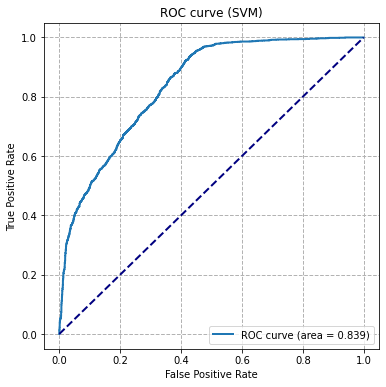

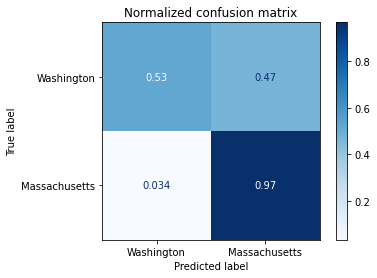

In [ ]:
svm = SVC(gamma='auto').fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
svm_label_score_predicted = svm.decision_function(x_test) # use decisioin_function to get better curve

# calculate accuracy, recall and precision
print_metrics(y_test,svm_predicted)

# plot ROC curve
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_label_score_predicted)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plot_roc_curve('SVM', svm_fpr, svm_tpr, svm_roc_auc)

# calculate and plot non-normalized confusion matrix
titles_options = [ ("Normalized confusion matrix", 'true')] #("Confusion matrix, without normalization", None),
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, x_test, y_test, display_labels=['Washington','Massachusetts'], cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

Accuracy:	 0.7531543932094517
Precision:	 0.7046382189239332
Recall:		 0.8715006883891694
F-1 Score:	 0.7792367665162083


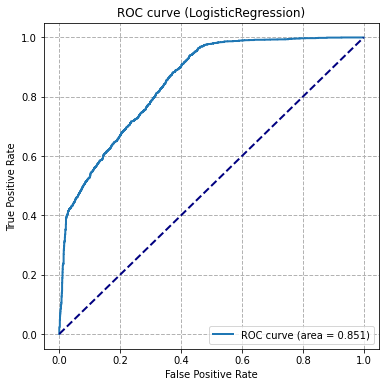

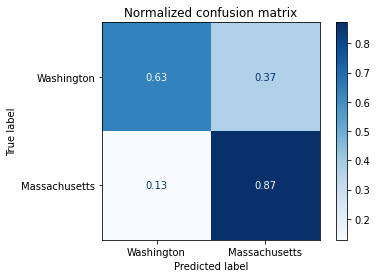

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l2', n_jobs=-1).fit(x_train,y_train)
LR_score = LR.decision_function(x_test)
LR_predictions = LR.predict(x_test)

# calculate accuracy, recall and precision
print_metrics(y_test,LR_predictions)

# plot ROC curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LR_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)
plot_roc_curve('LogisticRegression', lr_fpr, lr_tpr, lr_roc_auc)

# calculate and plot non-normalized confusion matrix
titles_options = [ ("Normalized confusion matrix", 'true')] #("Confusion matrix, without normalization", None),
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, x_test, y_test, display_labels=['Washington','Massachusetts'], cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

Accuracy:	 0.676990135352145
Precision:	 0.6984045290787442
Recall:		 0.6227627351996329
F-1 Score:	 0.658418243571082


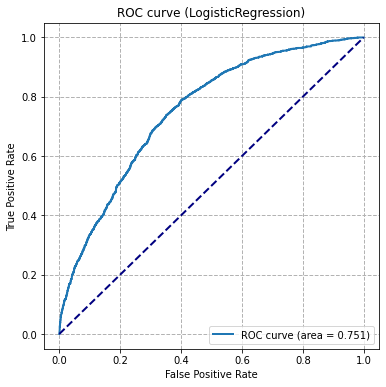

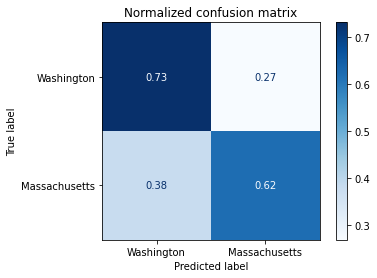

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train,y_train)
nb_predictions = nb.predict(x_test)
nb_score = nb.predict_log_proba(x_test)[:,1]

# calculate accuracy, recall and precision
print_metrics(y_test,nb_predictions)

# plot ROC curve
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_score)
nb_roc_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve('LogisticRegression', nb_fpr, nb_tpr, nb_roc_auc)

# calculate and plot non-normalized confusion matrix
titles_options = [ ("Normalized confusion matrix", 'true')] #("Confusion matrix, without normalization", None),
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test, display_labels=['Washington','Massachusetts'], cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

## Extra: Data Pre-Processing Summary

The followings steps preprocess the superbowl hashtag data for all hashtags so that it may be used for future steps

In [ ]:
# WARNING: run import statements and mount drive before doing this or your code will get COVID

# read files and parse into dataframes
filename_dict = {
    "patriots": "tweets_#patriots",
    "superbowl": "tweets_#superbowl",
    "nfl": "tweets_#nfl",
    "gopatriots": "tweets_#gopatriots",
    "sb49": "tweets_#sb49",
    "gohawks": "tweets_#gohawks"
}

# parse basic stats, initial 5 features
basic_stats = basicStatisticsParse(filename_dict)

# window basic stats into 1 hours windows for the entire dataset
#basic_windowed_stats = basicWindowedFeatures(basic_stats)

# parse additional stats (9 additional features)
extra_stats = extraStatisticsParse(filename_dict)

# combine basic features and extended features for all hashtags in analysis
combined_stats = {}
for key in filename_dict:
    combined_stats[key] = pd.concat([basic_stats[key], extra_stats[key]], axis=1)

# window all stats (basic and extra) into 1 hour bins
#extended_windowed_stats = extendedWindowedFeatures(combined_stats)

all_stats = dict()
all_stats['all'] = pd.DataFrame()
for key in filename_dict:
    all_stats['all'] = pd.concat([all_stats['all'], combined_stats[key]]).reset_index(drop=True)
#regressionAnalysisForPeriods(all_stats, report_summary=True)

#all_extended_windowed_stats = extendedWindowedFeatures(all_stats)

#print(all_extended_windowed_stats)


# refer to previous analysis to determine which columns to remove
'''
bad_features_dict = {
    #"patriots": [],
    "superbowl": ['max_followers', 'hour_of_day', 'unique_authors', 'average_passivity'],
    #"nfl": [],
    #"gopatriots": [],
    #"sb49": [],
    #"gohawks": []
}
'''

File Loop: 100%|██████████| 6/6 [04:41<00:00, 46.90s/it]


'\nbad_features_dict = {\n    #"patriots": [],\n    "superbowl": [\'max_followers\', \'hour_of_day\', \'unique_authors\', \'average_passivity\'],\n    #"nfl": [],\n    #"gopatriots": [],\n    #"sb49": [],\n    #"gohawks": []\n}\n'

# **Part 3: Deﬁne Your Own Project**

## Question 16
The dataset in hands is rich as there is a lot of metadata to each tweet. Be creative and propose a new problem (something interesting that can be inferred from this dataset) other than the previous parts. You can look into the literature of Twitter data analysis to get some ideas. Implement your idea and show that it works. As a suggestion, you might provide some analysis based on changes of tweet sentiments for fans of the opponent teams participating in the match. You get full credit for briniging in novelty and full or partial implementation of your new ideas.


In [ ]:
import json
import datetime
import pytz
import time
import pandas as pd
from pandas import DataFrame
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tqdm
import math
random.seed(42)

In [ ]:
# mount gdrive and confrim that dataset exists in this directory
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#upload the dataset to your google drive and put it in this path
%cd "/content/gdrive/My Drive/219/ECE219_tweet_data/"
!ls -a
file_path = !pwd
file_path = file_path[0]
print("File path: ", file_path)

/content/gdrive/My Drive/219/ECE219_tweet_data
tweets_#gohawks.txt	tweets_#nfl.txt       tweets_#sb49.txt
tweets_#gopatriots.txt	tweets_#patriots.txt  tweets_#superbowl.txt
File path:  /content/gdrive/My Drive/219/ECE219_tweet_data


In [ ]:
filename_dict = {
    "patriots": "tweets_#patriots",
    "superbowl": "tweets_#superbowl",
    "nfl": "tweets_#nfl",
    "gopatriots": "tweets_#gopatriots",
    "sb49": "tweets_#sb49",
    "gohawks": "tweets_#gohawks"
}

In [ ]:
def basicStatisticsParseLocation(filename_dict, combined=False):
    data_dict = {}
    lat, lon = [], []
    # pst_tz = pytz.timezone('America/Los_Angeles')
    for key, value in tqdm.tqdm(filename_dict.items(), desc='File Loop'):
        with open(os.path.join(file_path, value+'.txt'), 'r') as file:
            for line in file:
                data_line = json.loads(line)
                try:
                  lat.append(data_line['tweet']['coordinates']['coordinates'][0])
                  lon.append(data_line['tweet']['coordinates']['coordinates'][1])
                except:
                  pass
        # create a pandas dataframe with this information
        if not combined:
            metric_names = ['lat', 'lon']
            next_df = pd.DataFrame({
                'lat' : lat,
                'lon' : lon,
            }, columns=metric_names)
            #print(next_df.iloc[:5])
            data_dict[key] = next_df
            lat, lon = [], []
    if combined:
        metric_names = ['lat', 'lon']
        next_df = pd.DataFrame({
            'lat' : lat,
            'lon' : lon,
        }, columns=metric_names)
        #print(next_df.iloc[:5])
        data_dict['aggregate_tweets'] = next_df
    return data_dict

basic_stats = basicStatisticsParseLocation(filename_dict)       

File Loop: 100%|██████████| 6/6 [03:45<00:00, 37.52s/it]


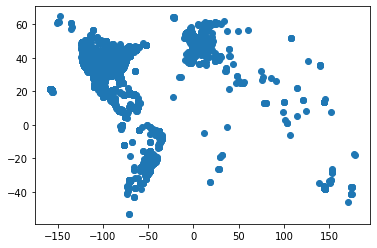

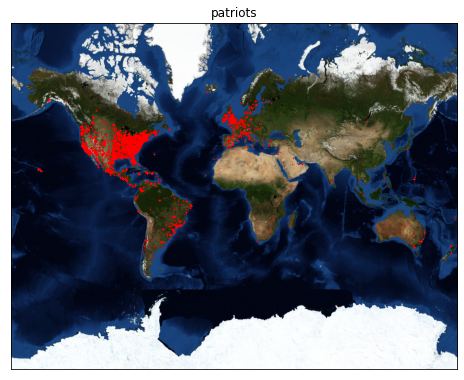

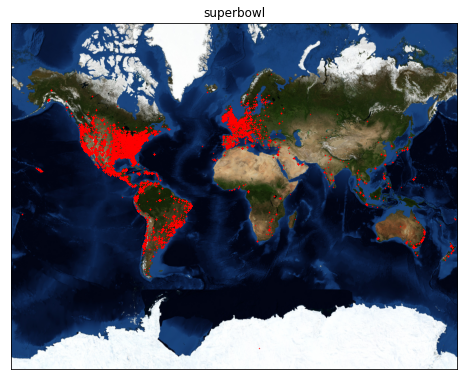

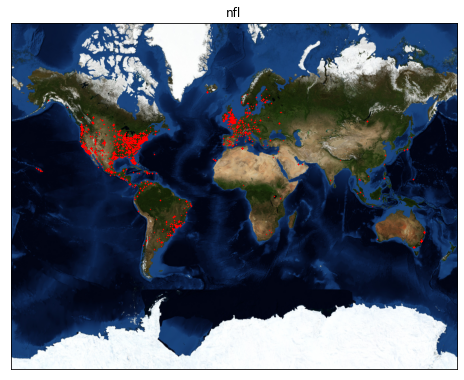

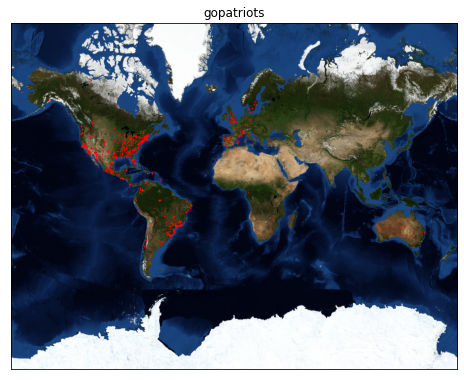

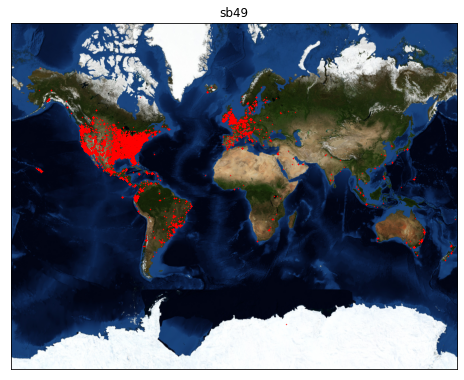

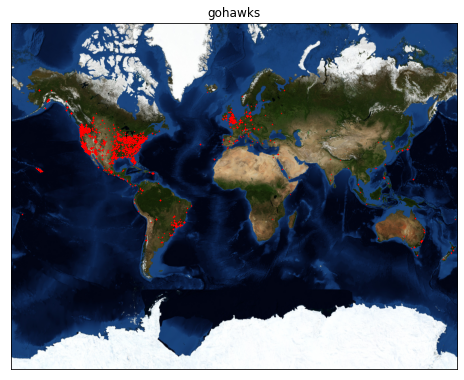

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=basic_stats['patriots']['lat'], y=basic_stats['patriots']['lon'])
plt.show()

# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# geometry = [Point(xy) for xy in zip(basic_stats['patriots']['lat'], basic_stats['patriots']['lon'])]
# gdf = GeoDataFrame(basic_stats('patriots'), geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# make up some data for scatter plot

for key, value in basic_stats.items():

  array = basic_stats[key].values
  lats = array[:,1]
  lons = array[:,0]

  fig = plt.gcf()
  fig.set_size_inches(8, 6.5)

  m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')


  m.bluemarble(scale=0.9)   # full scale will be overkill

  x, y = m(lons, lats)  # transform coordinates
  plt.scatter(x, y, .1, marker='o', color='Red') 

  plt.title(key)
  plt.show()

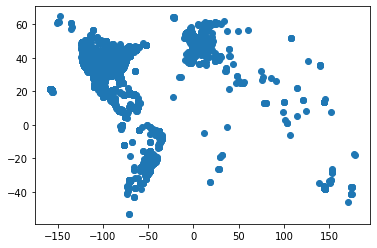

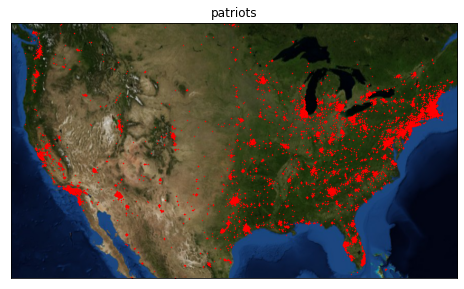

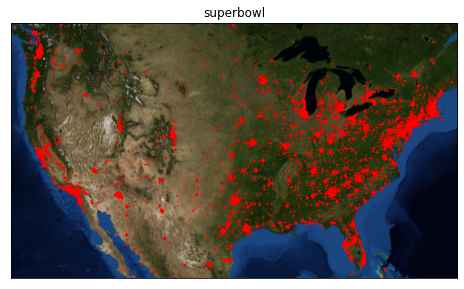

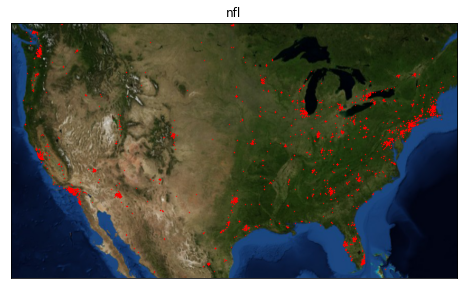

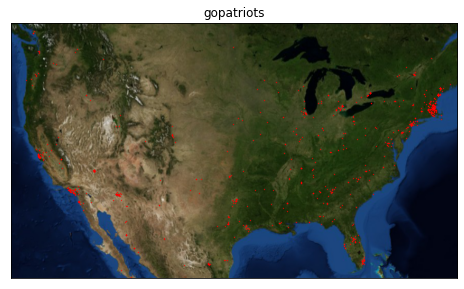

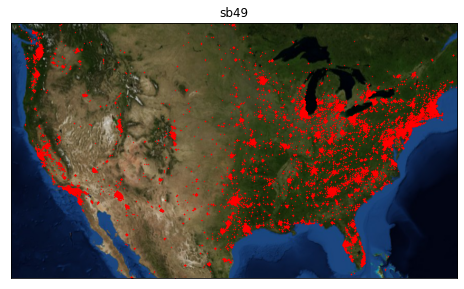

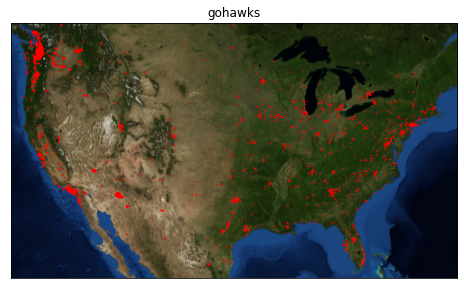

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=basic_stats['patriots']['lat'], y=basic_stats['patriots']['lon'])
plt.show()

# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# geometry = [Point(xy) for xy in zip(basic_stats['patriots']['lat'], basic_stats['patriots']['lon'])]
# gdf = GeoDataFrame(basic_stats('patriots'), geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# make up some data for scatter plot

for key, value in basic_stats.items():

  array = basic_stats[key].values
  lats = array[:,1]
  lons = array[:,0]

  fig = plt.gcf()
  fig.set_size_inches(8, 6.5)

  m = Basemap(projection='merc', \
              llcrnrlat=24, urcrnrlat=50, \
              llcrnrlon=-126, urcrnrlon=-68, \
              lat_ts=20, \
              resolution='c')

  m.bluemarble(scale=0.9)   # full scale will be overkill

  x, y = m(lons, lats)  # transform coordinates
  plt.scatter(x, y, .1, marker='o', color='Red') 

  plt.title(key)
  plt.show()

In [ ]:
vals = [0] * basic_stats['gopatriots'].size
df = pd.DataFrame({'team':vals})
pats = basic_stats['gopatriots']
pats['team'] = df
# print(pats)

vals = [1] * basic_stats['gohawks'].size
df = pd.DataFrame({'team':vals})
hawks = basic_stats['gohawks']
hawks['team'] = df
# print(hawks)

vertical_stack = pd.concat([pats, hawks], axis=0)
print(vertical_stack)

              lat        lon  team
0      -71.006108  42.237286     0
1      -99.165546  19.394573     0
2      -86.422495  36.936004     0
3      -70.704027  41.999698     0
4      -71.022865  42.106922     0
...           ...        ...   ...
10769  -82.530973  27.277105     1
10770 -117.419926  47.668360     1
10771 -122.016181  47.201556     1
10772 -122.285535  47.512703     1
10773  144.786139  13.505488     1

[12373 rows x 3 columns]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, make_scorer

y = vertical_stack['team']
X = vertical_stack[['lat','lon']]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf = RandomForestClassifier(random_state=42)

cv = KFold(5, shuffle=True)
cv_rf = RandomizedSearchCV(estimator=rf, n_iter=1, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_rf.fit(X, y)
cv_rf.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


{'max_depth': 70,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [ ]:
rf = RandomForestClassifier(**cv_rf.best_params_, n_jobs=-1, bootstrap=True, oob_score=True)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(rf, X, y, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
rf.fit(X, y)
y_pred = rf.predict(X)
print('Out of Bag error: ' + str(rf.oob_score_))
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 0.2283192995784861
Average Test RMSE: 0.2931137117086785
Out of Bag error: 0.9237048411864544
Training RMSE for 5 folds:
[0.23378945 0.22542925 0.23270658 0.22698096 0.22248584]
Test RMSE for 5 folds:
[0.2849774  0.28355606 0.24863262 0.2947945  0.34531159]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix


conf_mat = confusion_matrix(y, y_pred)
# plot_confusion_matrix(model = GaussianNB(), y, y_pred)
# print(conf_mat)
# print(accuracy_score(y, y_pred))
# print(f1_score(y, y_pred, average="macro"))
# print(precision_score(y, y_pred, average="macro"))
# print(recall_score(y, y_pred, average="macro"))   
# target_names = ['Patriots','Seahawks']
print(classification_report(y, y_pred, target_names= ['gopatriots','gohawks']))     

              precision    recall  f1-score   support

  gopatriots       0.89      0.68      0.77      1599
     gohawks       0.95      0.99      0.97     10774

    accuracy                           0.95     12373
   macro avg       0.92      0.83      0.87     12373
weighted avg       0.95      0.95      0.94     12373



In [ ]:
vals = [0] * basic_stats['gopatriots'].size
df = pd.DataFrame({'team':vals})
pats = basic_stats['gopatriots']
pats['team'] = df
# print(pats)

vals = [1] * basic_stats['gohawks'].size
df = pd.DataFrame({'team':vals})
hawks = basic_stats['gohawks']
hawks['team'] = df
# print(hawks)

vals = [2] * basic_stats['patriots'].size
df = pd.DataFrame({'team':vals})
hawks1 = basic_stats['patriots']
hawks1['team'] = df
# print(hawks)

vals = [3] * basic_stats['superbowl'].size
df = pd.DataFrame({'team':vals})
hawks2 = basic_stats['superbowl']
hawks2['team'] = df
# print(hawks)

vals = [4] * basic_stats['nfl'].size
df = pd.DataFrame({'team':vals})
hawks3 = basic_stats['nfl']
hawks3['team'] = df
# print(hawks)

vals = [5] * basic_stats['sb49'].size
df = pd.DataFrame({'team':vals})
hawks4 = basic_stats['sb49']
hawks4['team'] = df
# print(hawks)

vertical_stack = pd.concat([pats, hawks, hawks1, hawks2, hawks3, hawks4], axis=0)
print(vertical_stack)

              lat        lon  team
0      -71.006108  42.237286     0
1      -99.165546  19.394573     0
2      -86.422495  36.936004     0
3      -70.704027  41.999698     0
4      -71.022865  42.106922     0
...           ...        ...   ...
37317  -70.861879  42.126001     5
37318  -71.035491  43.059981     5
37319  -79.652740   0.957280     5
37320  -79.652740   0.957280     5
37321 -112.262632  33.527453     5

[133343 rows x 3 columns]


In [ ]:
y = vertical_stack['team']
X = vertical_stack[['lat','lon']]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'max_depth': [10, 30, 50, 70, 100, 200, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800]
}

rf = RandomForestClassifier(random_state=42)

cv = KFold(5, shuffle=True)
cv_rf = RandomizedSearchCV(estimator=rf, n_iter=1, param_distributions=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, verbose=2)
cv_rf.fit(X, y)
cv_rf.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
rf = RandomForestClassifier(**cv_rf.best_params_, n_jobs=-1, bootstrap=True, oob_score=True)
scoring = {'mse':make_scorer(mean_squared_error)}
cv = cross_validate(rf, X, y, cv=5, return_train_score=True, scoring=scoring)
print('Average Training RMSE: ' + str(math.sqrt(cv['train_mse'].mean())))
print('Average Test RMSE: ' + str(math.sqrt(cv['test_mse'].mean())))
rf.fit(X, y)
y_pred = rf.predict(X)
print('Out of Bag error: ' + str(rf.oob_score_))
train_rmse = np.sqrt(cv['train_mse'])
test_rmse = np.sqrt(cv['test_mse'])
print('Training RMSE for 5 folds:')
print(train_rmse)
print('Test RMSE for 5 folds:')
print(test_rmse)

Average Training RMSE: 1.0962376149570383
Average Test RMSE: 1.677122435217355
Out of Bag error: 0.48614475450529837
Training RMSE for 5 folds:
[1.1208707  1.0392534  1.04266198 1.11024376 1.16297059]
Test RMSE for 5 folds:
[1.77199753 1.77725874 1.73053473 1.59000742 1.49739787]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix


conf_mat = confusion_matrix(y, y_pred)
# plot_confusion_matrix(model = GaussianNB(), y, y_pred)
# print(conf_mat)
# print(accuracy_score(y, y_pred))
# print(f1_score(y, y_pred, average="macro"))
# print(precision_score(y, y_pred, average="macro"))
# print(recall_score(y, y_pred, average="macro"))   
# target_names = ['Patriots','Seahawks']
print(classification_report(y, y_pred, target_names= ['gopatriots','gohawks','patriots','superbowl','nfl','sb49']))    

              precision    recall  f1-score   support

  gopatriots       0.78      0.28      0.41      1599
     gohawks       0.81      0.76      0.78     10774
    patriots       0.67      0.40      0.50     19732
   superbowl       0.80      0.92      0.85     58663
         nfl       0.68      0.28      0.39      5253
        sb49       0.73      0.80      0.76     37322

    accuracy                           0.76    133343
   macro avg       0.74      0.57      0.62    133343
weighted avg       0.75      0.76      0.75    133343

